## Counters

* Route
    * [`/agas{locality#*/total}/count/route`](#Route)
    * [`/agas{locality#*/total}/time/route`](#Route)
* GID Creation/Destruction
    * [`/agas{locality#*/total}/count/bind_gid`](#Bind-GID)
    * [`/agas{locality#*/total}/count/unbind_gid`](#Unbind-GID)
* Resolution
    * [`/agas{locality#*/total}/count/resolve_gid`](#Resolve-GID)
    * [`/agas{locality#*/total}/time/resolve_gid`](#Resolve-GID)
* Garbage Collection (Credit)
    * [`/agas{locality#*/total}/count/decrement_credit`](#Decrement-Credit)
    * [`/agas{locality#*/total}/time/decrement_credit`](#Decrement-Credit)
    * [`/agas{locality#*/total}/count/increment_credit`](#Increment-Credit)
    * [`/agas{locality#*/total}/time/increment_credit`](#Increment-Credit)
* Allocate
    * [`/agas{locality#*/total}/count/allocate`](#Allocate)
    * [`/agas{locality#*/total}/time/allocate`](#Allocate)
* Migration
    * [`/agas{locality#*/total}/count/begin_migration`](#Begin-Migration)
    * [`/agas{locality#*/total}/time/begin_migration`](#Begin-Migration)
    * [`/agas{locality#*/total}/count/end_migration`](#End-Migration)
    * [`/agas{locality#*/total}/time/end_migration`](#End-Migration)
* Component Namespace
    * [`/agas{locality#0/total}/count/bind_prefix`](#Bind-Prefix)
    * [`/agas{locality#0/total}/time/bind_prefix`](#Bind-Prefix)
    * [`/agas{locality#0/total}/count/bind_name`](#Bind-Name)
    * [`/agas{locality#0/total}/time/bind_name`](#Bind-Name)
    * [`/agas{locality#0/total}/count/unbind_name`](#Unbind-Name)
    * [`/agas{locality#0/total}/time/unbind_name`](#Unbind-Name)
    * [`/agas{locality#0/total}/count/resolve_id`](#Resolve-ID)
    * [`/agas{locality#0/total}/time/resolve_id`](#Resolve-ID)
    * [`/agas{locality#0/total}/time/iterate_types`](#Iterate-Types)
    * [`/agas{locality#0/total}/count/iterate_types`](#Iterate-Types)
    * [`/agas{locality#0/total}/count/get_component_typename`](#Get-Component-Type-Name)
    * [`/agas{locality#0/total}/time/get_component_typename`](#Get-Component-Type-Name)
    * [`/agas{locality#0/total}/count/num_localities_type`](#Number-of-Locality-Type)
    * [`/agas{locality#0/total}/time/num_localities_type`](#Number-of-Locality-Type)
* Locality Namespace
    * [`/agas{locality#0/total}/count/free`](#Free)
    * [`/agas{locality#0/total}/time/free`](#Free)
    * [`/agas{locality#0/total}/count/localities`](#Localities)
    * [`/agas{locality#0/total}/time/localities`](#Localities)
    * [`/agas{locality#0/total}/count/num_localities`](#Number-of-Localities)
    * [`/agas{locality#0/total}/time/num_localities`](#Number-of-Localities)
    * [`/agas{locality#*/total}/count/resolve_locality`](#Resolve-Locality)
    * [`/agas{locality#*/total}/time/resolve_locality`](#Resolve-Locality)
    * [`/agas{locality#0/total}/count/num_threads`](#Number-of-Threads)
    * [`/agas{locality#0/total}/time/num_threads`](#Number-of-Threads)
* Symbol Namespace
    * [`/agas{locality#*/total}/count/bind`](#Bind)
    * [`/agas{locality#*/total}/time/bind`](#Bind)
    * [`/agas{locality#*/total}/count/unbind`](#Unbind)
    * [`/agas{locality#*/total}/time/unbind`](#Unbind)
    * [`/agas{locality#*/total}/count/resolve`](#Resolve)
    * [`/agas{locality#*/total}/time/resolve`](#Resolve)
    * [`/agas{locality#*/total}/count/iterate_names`](#Iterate-Names)
    * [`/agas{locality#*/total}/time/iterate_names`](#Iterate-Names)
    * [`/agas{locality#*/total}/count/on_symbol_namespace_event`](#On-Symbol-Namespace-Event)
    * [`/agas{locality#*/total}/time/on_symbol_namespace_event`](#On-Symbol-Namespace-Event)
* AGAS Cache
    * Number of Cache Entries
        * [`/agas{locality#*/total}/count/cache/entries`](#Number-of-Cache-Entries)
    * Cache Events
        * [`/agas{locality#*/total}/count/cache/insertions`](#AGAS-Cache-Insertions)
        * [`/agas{locality#*/total}/count/cache/evictions`](#AGAS-Cache-Evictions)
        * [`/agas{locality#*/total}/count/cache/hits`](#AGAS-Cache-Hit-Rate)
        * [`/agas{locality#*/total}/count/cache/misses`](#AGAS-Cache-Hit-Rate)
    * Cache API Functions
        * [`/agas{locality#*/total}/time/cache/get_entry`](#Get-Entry)
        * [`/agas{locality#*/total}/time/cache/insert_entry`](#Insert-Entry)
        * [`/agas{locality#*/total}/count/cache/update_entry`](#Update-Entry)
        * [`/agas{locality#*/total}/time/cache/update_entry`](#Update-Entry)
        * [`/agas{locality#*/total}/time/cache/erase_entry`](#Erase-Entry)
* Overview
    * [`/agas{locality#*/total}/primary/count`](#Primary-Namespace)
    * [`/agas{locality#*/total}/primary/time`](#Primary-Namespace)
    * [`/agas{locality#0/total}/component/count`](#Component-Namespace)
    * [`/agas{locality#0/total}/component/time`](#Component-Namespace)
    * [`/agas{locality#0/total}/locality/count`](#Locality-Namespace)
    * [`/agas{locality#0/total}/locality/time`](#Locality-Namespace)
    * [`/agas{locality#*/total}/symbol/count`](#Symbol-Namespace)
    * [`/agas{locality#*/total}/symbol/time`](#Symbol-Namespace)

### Notebook Preps

In [1]:
%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

In [1]:
import re

In [2]:
import numpy as np
import pandas as pd
#import scipy as sp

import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [3]:
def percent_formatter(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

PercentFormatter = ticker.FuncFormatter(percent_formatter)

---

## Performance Counter Parsing RegEx

In [4]:
locality_regex = re.compile('/agas\{locality#(\d+)[^}]*\}')

In [5]:
pfx_counter_regex = re.compile(
    '/([a-z_]+){locality#(\d+)/total}/(?:(?:(count|time)/)'
    '([a-z/_-]+)|([a-z/_-]+)/(?:(count|time))),([0-9]+),'
    '([0-9.]+),\[[a-z]+\],([0-9.\+e]+)(?:,\[([a-z]+)?\])?'
)

## Read the Data Files

In [6]:
import zipfile

In [7]:
dataset = []

with zipfile.ZipFile('daint-28mar19_14_15.zip', 'r') as arxiv:
    for fn in arxiv.namelist():
        if fn.endswith('.out'):
            content = arxiv.read(fn).decode('utf-8')
            content = arxiv.read(fn).decode('utf-8')
            localities = set(int(x) for x in locality_regex.findall(content))
            if (localities):
                print('Processing "%s"...' % fn)
            else:
                print('No data found in "%s". Skipping...' % fn)
                continue
            node_count = max(localities) + 1
            
            for m in pfx_counter_regex.finditer(content):
                is_rev = m.group(3) != None

                dataset.append({
                    'sys': m.group(1),
                    'proc': (m.group(4) if is_rev else m.group(5)).replace('/', '.'),
                    'type': m.group(3) if is_rev else m.group(6),
                    'locality': int(m.group(2)),
                    'value': float(m.group(9)),
                    'value_unit': m.group(10),
                    'timestamp': float(m.group(8)),
                    'iteration': int(m.group(7)),
                    'nodes': node_count,
                })

df = pd.DataFrame(dataset)

No data found in "parsa-12632971.out". Skipping...
No data found in "parsa-12632972.out". Skipping...
No data found in "parsa-12632973.out". Skipping...
No data found in "parsa-12632974.out". Skipping...
No data found in "parsa-12632976.out". Skipping...
No data found in "parsa-12632977.out". Skipping...
No data found in "parsa-12632978.out". Skipping...
No data found in "parsa-12632979.out". Skipping...
No data found in "parsa-12632980.out". Skipping...
No data found in "parsa-12632982.out". Skipping...
No data found in "parsa-12632983.out". Skipping...
No data found in "parsa-12632985.out". Skipping...
No data found in "parsa-12632986.out". Skipping...
No data found in "parsa-12632994.out". Skipping...
No data found in "parsa-12632995.out". Skipping...
No data found in "parsa-12632997.out". Skipping...
Processing "parsa-12632998.out"...
Processing "parsa-12633000.out"...
Processing "parsa-12633001.out"...
Processing "parsa-12633002.out"...
Processing "parsa-12633003.out"...
Processin

```python
import tarfile

dataset = []

with tarfile.open('cori-17mar17.tar.bz2', mode='r:bz2') as arxiv:
    for i in arxiv.getnames():
        if i.endswith('.txt'):
            n_nodes = int(i.split('.')[0])
            fd = arxiv.extractfile(i)
            for m in pfx_pattern.finditer(fd.read()):
                is_rev = m.group(3) != None

                dataset.append({
                    'sys': m.group(1),
                    'proc': (m.group(4) if is_rev else m.group(5)).replace('/', '.'),
                    'type': m.group(3) if is_rev else m.group(6),
                    'locality': int(m.group(2)),
                    'value': float(m.group(9)),
                    'value_unit': m.group(10),
                    'timestamp': m.group(8),
                    'iteration': int(m.group(7)),
                    'nodes': n_nodes,
                })

df = pd.DataFrame(dataset)
```

### Last Iteration

In [8]:
d = None
for i, j in df[['nodes', 'iteration']].groupby('nodes').max().iteration.to_dict().items():
    x = df[(df.nodes==i) & (df.iteration==j)]
    if d is None:
        d = x
    else:
        d = pd.concat([d, x])

In [9]:
print(d[(d.sys=='agas') & (d.type=='count')].proc.unique())
print(d[(d.sys=='agas') & (d.type=='time')].proc.unique())

['route' 'bind_gid' 'unbind_gid' 'resolve_gid' 'increment_credit'
 'decrement_credit' 'allocate' 'begin_migration' 'end_migration'
 'bind_prefix' 'bind_name' 'unbind_name' 'resolve_id' 'iterate_types'
 'get_component_typename' 'num_localities_type' 'free' 'localities'
 'num_localities' 'resolve_locality' 'num_threads' 'bind' 'unbind'
 'resolve' 'iterate_names' 'on_symbol_namespace_event' 'cache.entries'
 'cache.insertions' 'cache.evictions' 'cache.hits' 'cache.misses'
 'cache.get_entry' 'cache.insert_entry' 'cache.update_entry'
 'cache.erase_entry' 'primary' 'component' 'locality' 'symbol']
['route' 'bind_gid' 'unbind_gid' 'resolve_gid' 'decrement_credit'
 'increment_credit' 'allocate' 'begin_migration' 'end_migration'
 'bind_prefix' 'bind_name' 'unbind_name' 'resolve_id' 'iterate_types'
 'get_component_typename' 'num_localities_type' 'free' 'localities'
 'num_localities' 'resolve_locality' 'num_threads' 'bind' 'unbind'
 'resolve' 'iterate_names' 'on_symbol_namespace_event' 'cache.get_

---

## Total

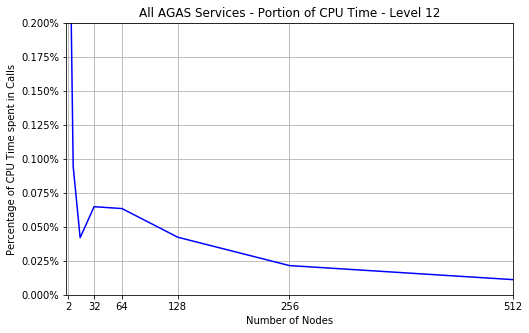

In [19]:
a = []
for i in range(0, 11):
    a += [1e-9 * d[(d.sys=='agas') & (d.nodes==2**i) & (d.type=='time') & (d.locality!=0) & (d.locality!=0)].value.sum() / ((2 ** i - 1) * 24 * 362)]

plt.figure(figsize=(8,5))
plt.plot([2**i for i in range(0, 11)],a, c='b')
plt.grid()

plt.title('All AGAS Services - Portion of CPU Time - Level 12')
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of CPU Time spent in Calls')

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([2, 32, 64, 128, 256, 512, 1024]))
plt.gca().set_xlim(left=0., right=512)
plt.gca().set_ylim(bottom=0., top=.002)

plt.savefig('octotiger_total_time.pdf')

## GIDs

### Bind GID

(0.0, 584.3060706401767)

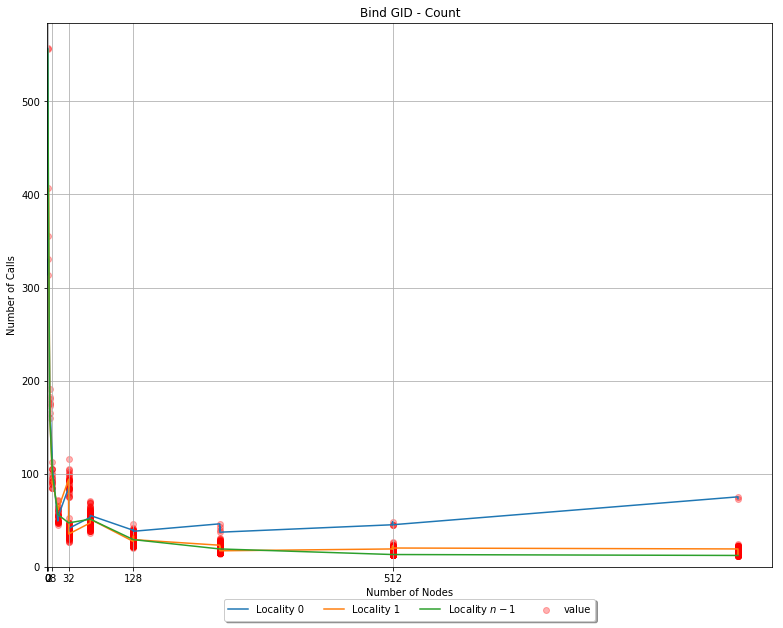

In [12]:
crt = d[(d.sys=='agas') & (d.proc=='bind_gid') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind GID - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

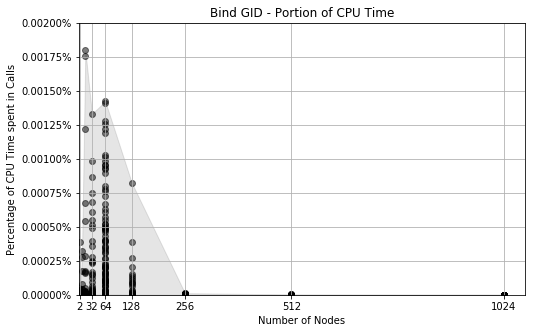

In [214]:
crt = d[(d.sys=='agas') & (d.proc=='bind_gid') & (d.type=='time')]
t = (1e-9 * crt.value / crt.timestamp) / 24.

plt.figure(figsize=(8, 5))
plt.scatter(crt.nodes, t, c='0', alpha=.5)

og = crt.sort_values(by='value', ascending=False).groupby('nodes', as_index=False)
y1 = (1e-9 * og.first().value / og.first().timestamp) / 24.
y2 = (1e-9 * og.last().value / og.last().timestamp) / 24.
#plt.fill_between(crt.nodes, t, facecolor='r', alpha=.1)
plt.fill_between(og.groups.keys(), y1, y2, label='Other Localities', alpha=.1, color='0')

plt.grid()

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind GID - Portion of CPU Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of CPU Time spent in Calls')

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([2, 32, 64, 128, 256, 512, 1024]))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0., top=.00002)

plt.savefig('../graphs/octotiger_bind_gid_time.pdf')

(0.0, 2000000.0)

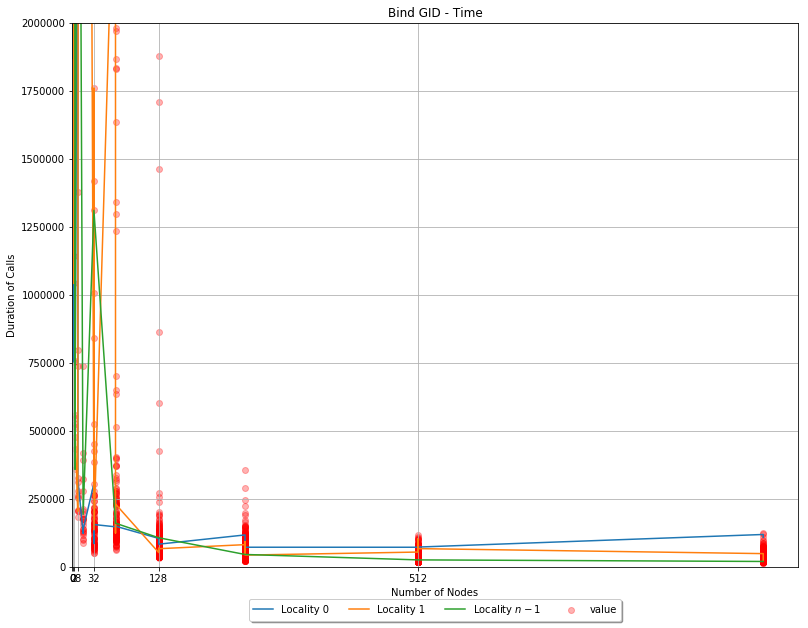

In [16]:
crt = d[(d.sys=='agas') & (d.proc=='bind_gid') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind GID - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0., top=2e6)

[^ TOC ^](#Counters)

### Unbind GID

(0.0, 553.3560706401767)

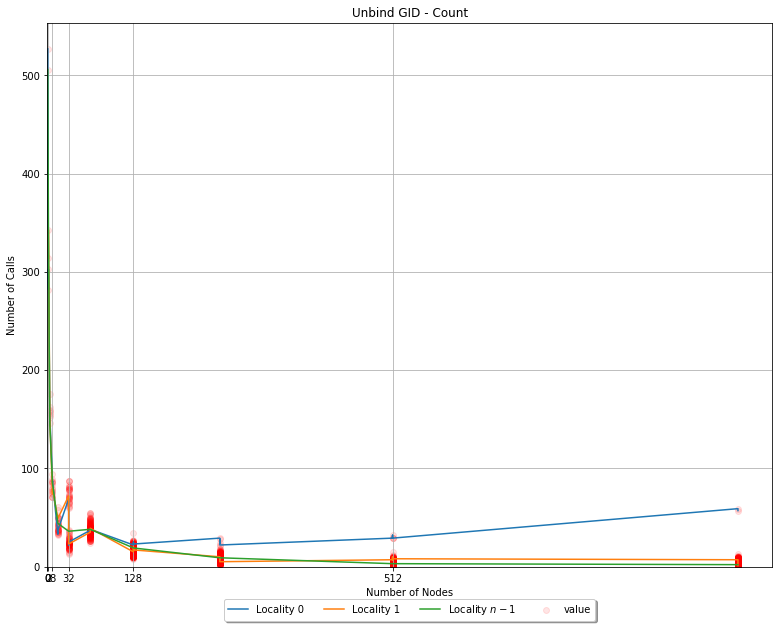

In [13]:
crt = d[(d.sys=='agas') & (d.proc=='unbind_gid') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.1)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Unbind GID - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Resolve GID

(0.0, 44913904.60607064)

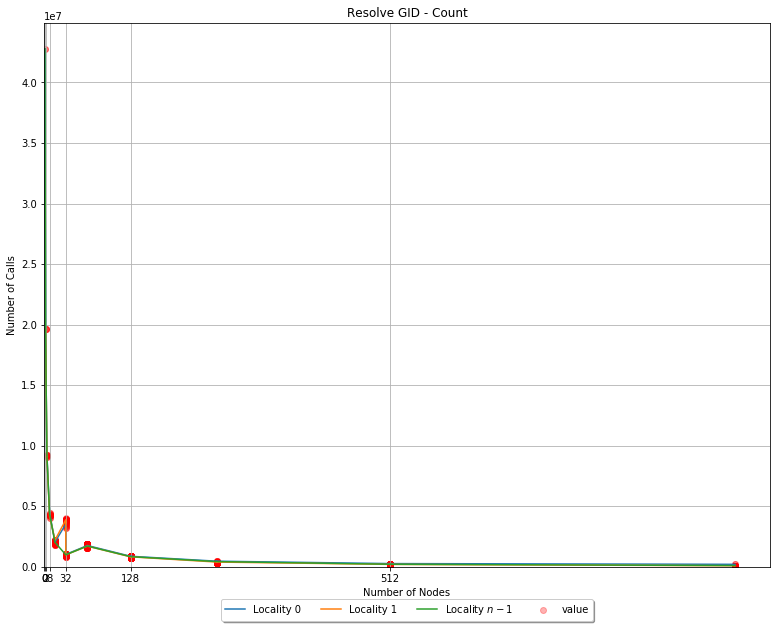

In [305]:
crt = d[(d.sys=='agas') & (d.proc=='resolve_gid') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Resolve GID - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

In [301]:
crt[(crt.nodes == 1)]

,iteration,locality,nodes,proc,sys,timestamp,type,value,value_unit
264031,1,0,1,resolve_gid,agas,249.395694,time,9.436940e+10,ns
264104,1,0,1,resolve_gid,agas,248.568662,time,8.950760e+10,ns


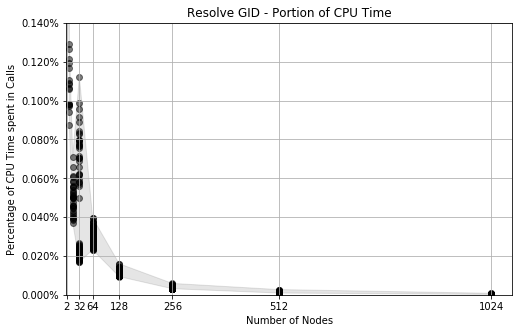

In [231]:
crt = d[(d.sys=='agas') & (d.proc=='resolve_gid') & (d.type=='time')]
t = (1e-9 * crt.value / crt.timestamp) / 24.

plt.figure(figsize=(8, 5))
plt.scatter(crt.nodes, t, c='0', alpha=.5)

og = crt.sort_values(by='value', ascending=False).groupby('nodes', as_index=False)
y1 = (1e-9 * og.first().value / og.first().timestamp) / 24.
y2 = (1e-9 * og.last().value / og.last().timestamp) / 24.
plt.fill_between(og.groups.keys(), y1, y2, label='Other Localities', alpha=.1, color='0')
#
plt.grid()

plt.title('Resolve GID - Portion of CPU Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of CPU Time spent in Calls')

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([2, 32, 64, 128, 256, 512, 1024]))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0., top=.0014)
plt.savefig('../graphs/octotiger_resolve_gid_time.pdf', format='pdf')

[^ TOC ^](#Counters)

---

## Garbage Collection

### Increment Credit

(0.0, 1302.0060706401766)

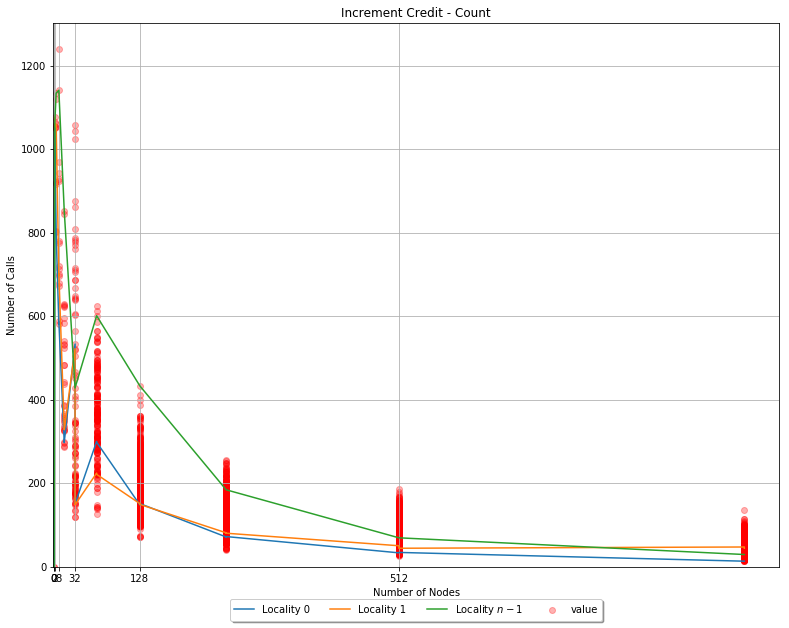

In [16]:
crt = d[(d.sys=='agas') & (d.proc=='increment_credit') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Increment Credit - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 1217496.0060706402)

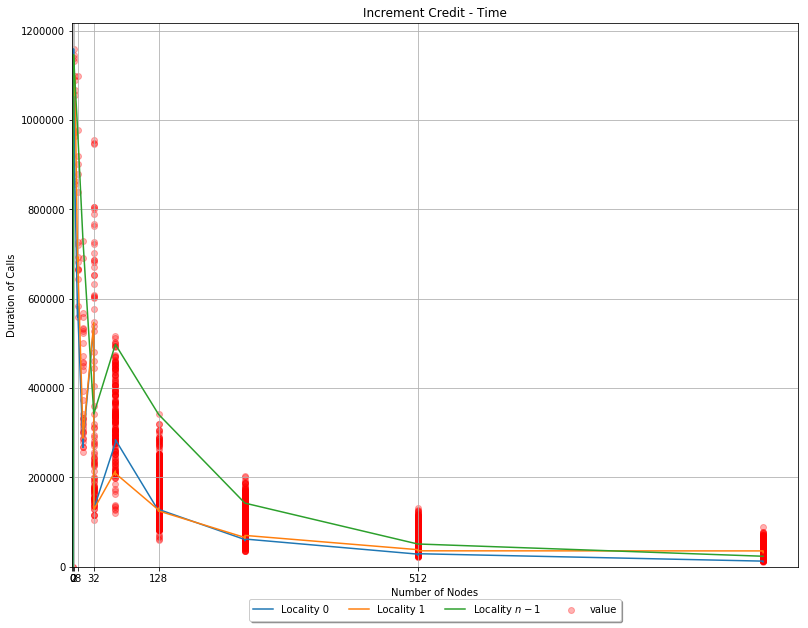

In [17]:
crt = d[(d.sys=='agas') & (d.proc=='increment_credit') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Increment Credit - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Decrement Credit

(0.0, 2609.056070640177)

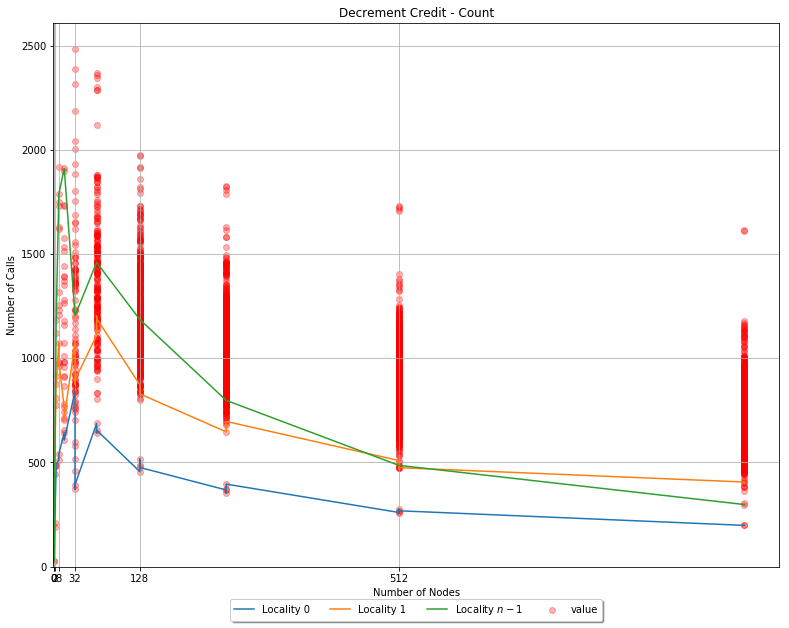

In [18]:
crt = d[(d.sys=='agas') & (d.proc=='decrement_credit') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Decrement Credit - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

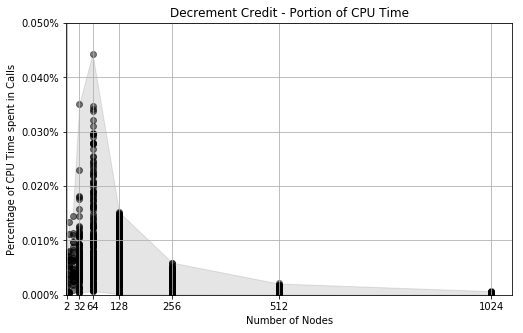

In [216]:
crt = d[(d.sys=='agas') & (d.proc=='decrement_credit') & (d.type=='time')]
t = (1e-9 * crt.value / crt.timestamp) / 24.

plt.figure(figsize=(8, 5))
plt.scatter(crt.nodes, t, c='0', alpha=.5)

og = crt.sort_values(by='value', ascending=False).groupby('nodes', as_index=False)
y1 = (1e-9 * og.first().value / og.first().timestamp) / 24.
y2 = (1e-9 * og.last().value / og.last().timestamp) / 24.
plt.fill_between(og.groups.keys(), y1, y2, label='Other Localities', alpha=.1, color='0')
#
plt.grid()

plt.title('Decrement Credit - Portion of CPU Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of CPU Time spent in Calls')

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([2, 32, 64, 128, 256, 512, 1024]))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0., top=0.0005)

plt.savefig('../graphs/octotiger_decrement_credit_time.pdf')

[^ TOC ^](#Counters)

---

## Locality Namespace

### Route

(0.0, 1479.4560706401767)

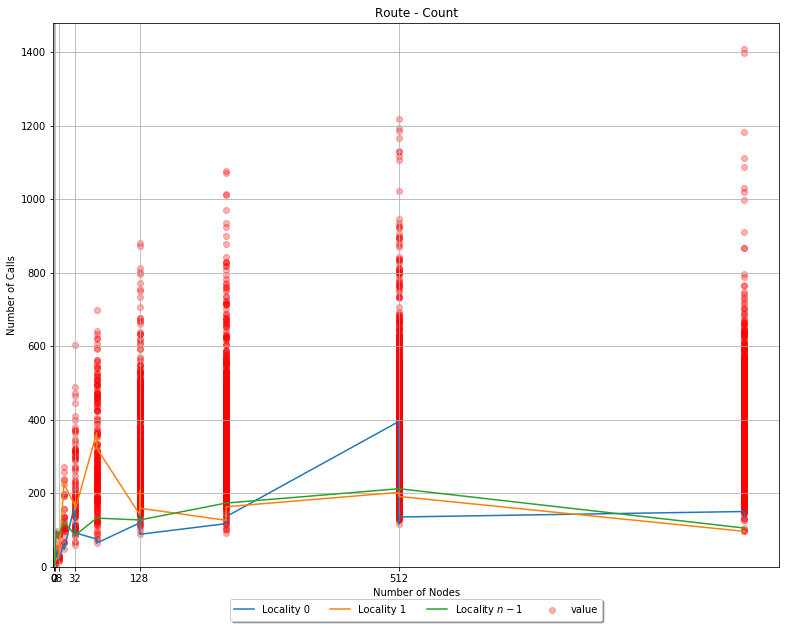

In [227]:
crt = d[(d.sys=='agas') & (d.proc=='route') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Route - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

In [291]:
for i, j in enumerate(crt[crt.locality==0].value):
    print(i, int(j), hex(int(j)))

0 0x15f8dac4c0
1 0x14d7119680
2 0x5ff380d60
3 0x5a9ae2a00
4 0x2036671a0
5 0x1ffc8d880
6 0x7c9c7b70
7 0x8476faf0
8 0x2fe9bb58
9 0x2ca37d80
10 0x5f3fb290
11 0x154fcb98
12 0x1424b530
13 0x2315b080
14 0x277bc9c0
15 0x2cddded0
16 0x11d834f0
17 0x132b1ac0
18 0x120e0e18
19 0x1521e598
20 0xa085818
21 0xa39dfc8
22 0x9c63668
23 0x95f5a60
24 0x6196e90
25 0x64b9e38
26 0x5ef68c0
27 0x5eccb9c
28 0x3e423b8
29 0x41bab58


Exclude locality 0 measurements for route time. The measurements are obviously wrong.

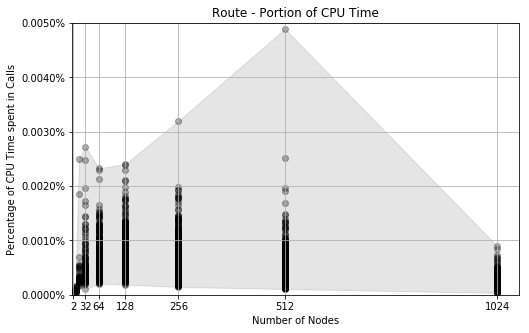

In [213]:
crt = d[(d.sys=='agas') & (d.proc=='route') & (d.type=='time') & (d.locality!=0)]
t = (1e-9 * crt.value / crt.timestamp) / 24.

plt.figure(figsize=(8, 5))
plt.scatter(crt.nodes, t, c='0', alpha=.3)

og = crt.sort_values(by='value', ascending=False).groupby('nodes', as_index=False)
y1 = (1e-9 * og.first().value / og.first().timestamp) / 24.
y2 = (1e-9 * og.last().value / og.last().timestamp) / 24.
plt.fill_between(og.groups.keys(), y1, y2, label='Other Localities', alpha=.1, color='0')
#
#t = crt[crt.locality==0]
#plt.plot(t.nodes, (1e-9 * t.value / t.timestamp) / 24., label='Locality 0')
#
plt.grid()

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Route - Portion of CPU Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of CPU Time spent in Calls')

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([2, 32, 64, 128, 256, 512, 1024]))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0., top=.00005)

plt.savefig('../graphs/octotiger_route_time.pdf')

[^ TOC ^](#Counters)

### Allocate

(0.0, 23.656070640176605)

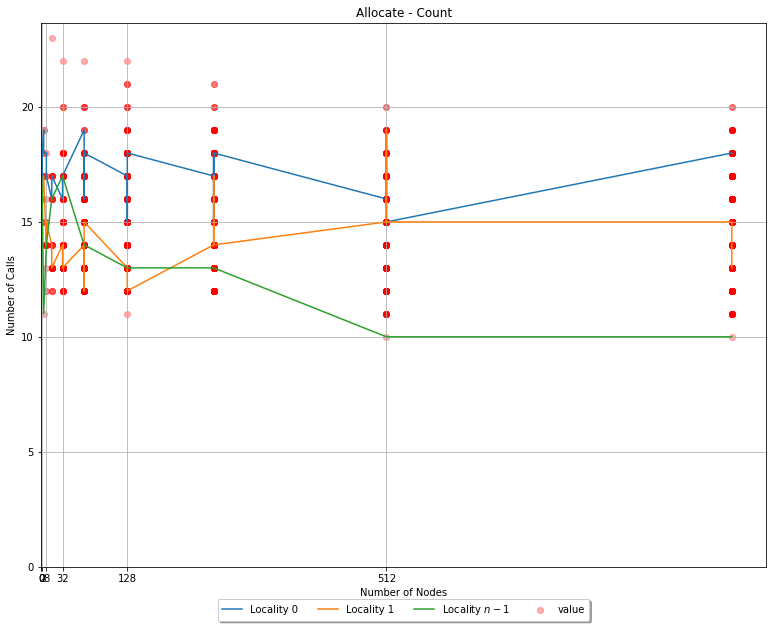

In [22]:
crt = d[(d.sys=='agas') & (d.proc=='allocate') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Allocate - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 11905.406070640176)

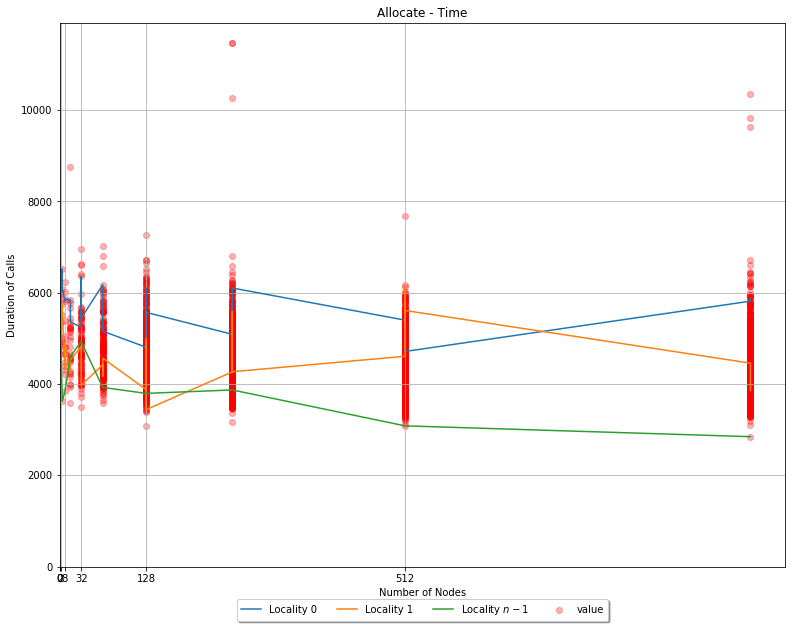

In [23]:
crt = d[(d.sys=='agas') & (d.proc=='allocate') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Allocate - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

## Migration

### Begin Migration

(0.0, 0.006070640176600442)

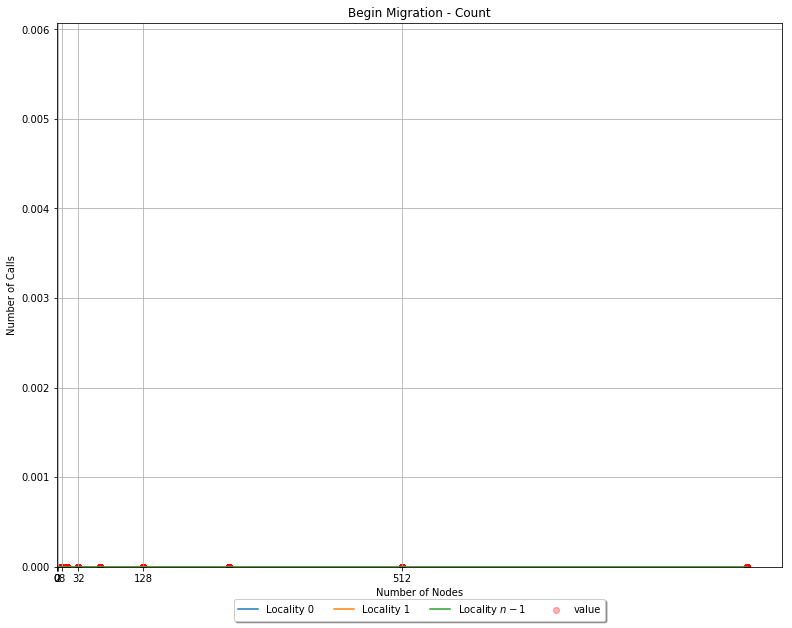

In [24]:
crt = d[(d.sys=='agas') & (d.proc=='begin_migration') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Begin Migration - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

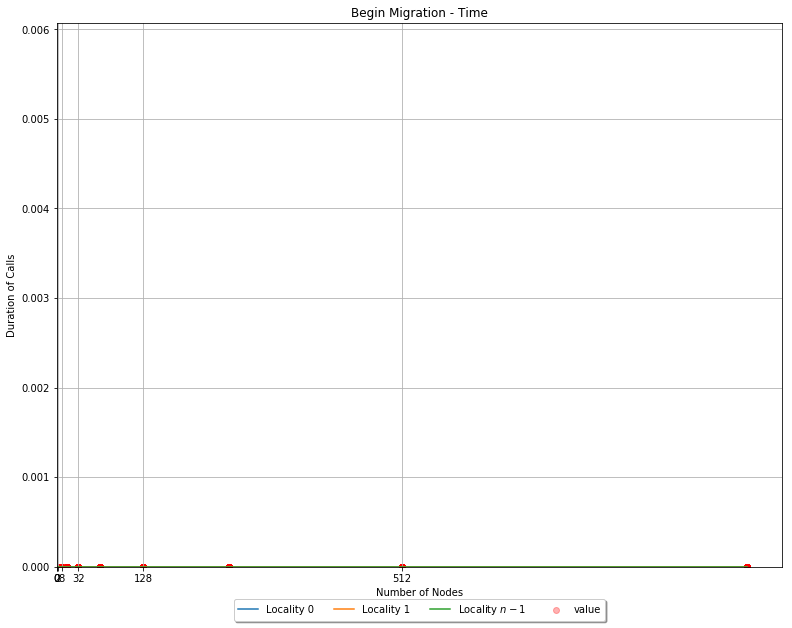

In [25]:
crt = d[(d.sys=='agas') & (d.proc=='begin_migration') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Begin Migration - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### End Migration

(0.0, 0.006070640176600442)

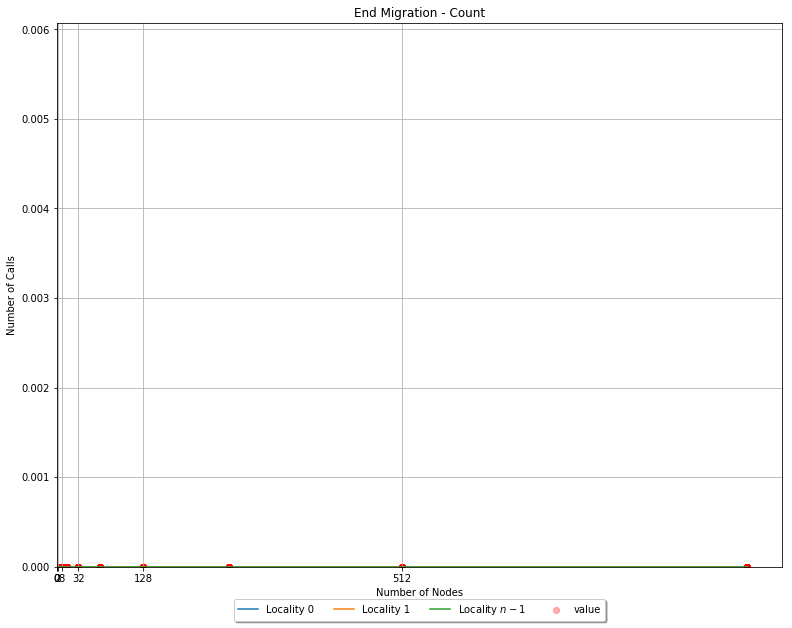

In [26]:
crt = d[(d.sys=='agas') & (d.proc=='end_migration') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('End Migration - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

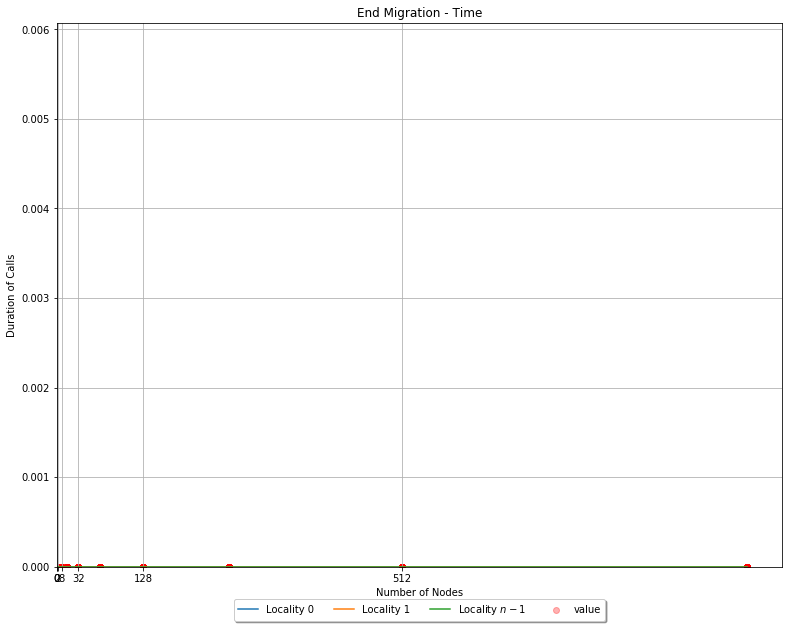

In [27]:
crt = d[(d.sys=='agas') & (d.proc=='end_migration') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('End Migration - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

## Component Namespace

### Bind Prefix

(0.0, 0.006070640176600442)

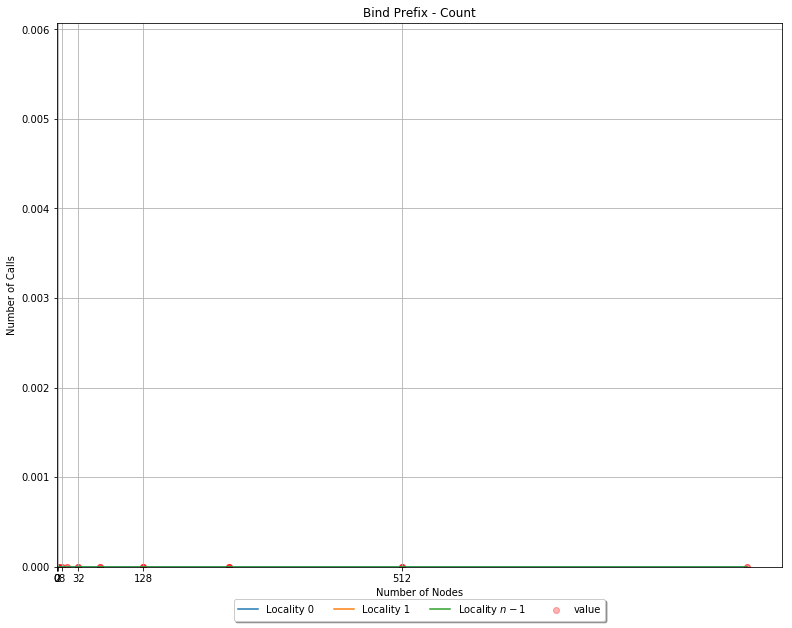

In [28]:
crt = d[(d.sys=='agas') & (d.proc=='bind_prefix') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind Prefix - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

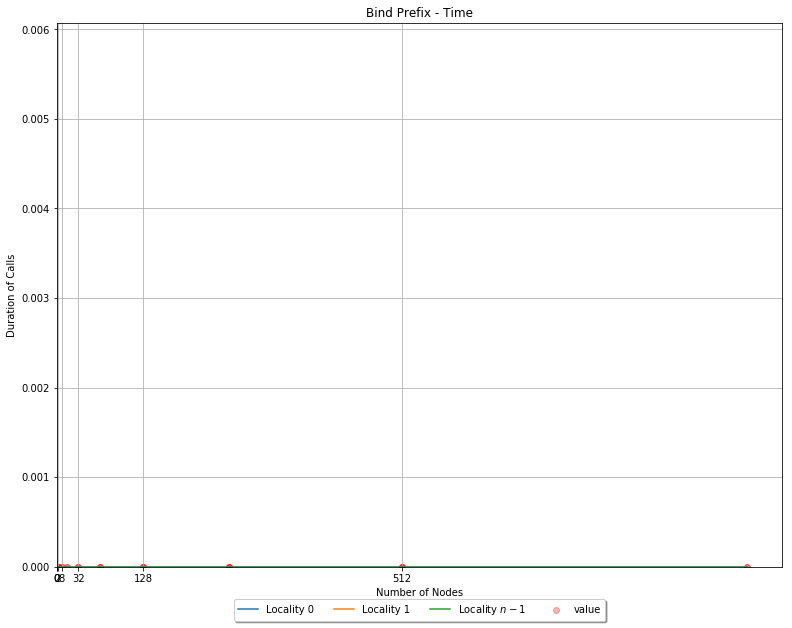

In [29]:
crt = d[(d.sys=='agas') & (d.proc=='bind_prefix') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind Prefix - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Bind Name

(0.0, 0.006070640176600442)

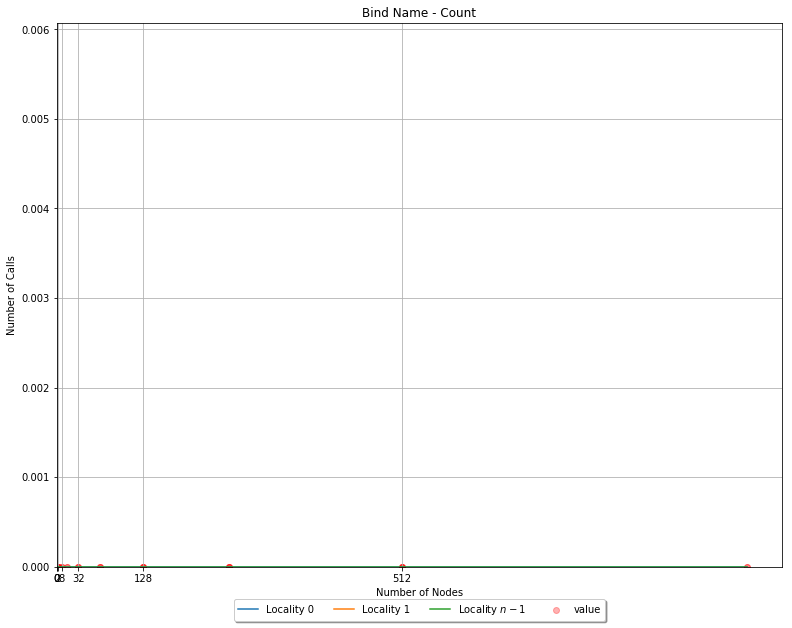

In [30]:
crt = d[(d.sys=='agas') & (d.proc=='bind_name') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind Name - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

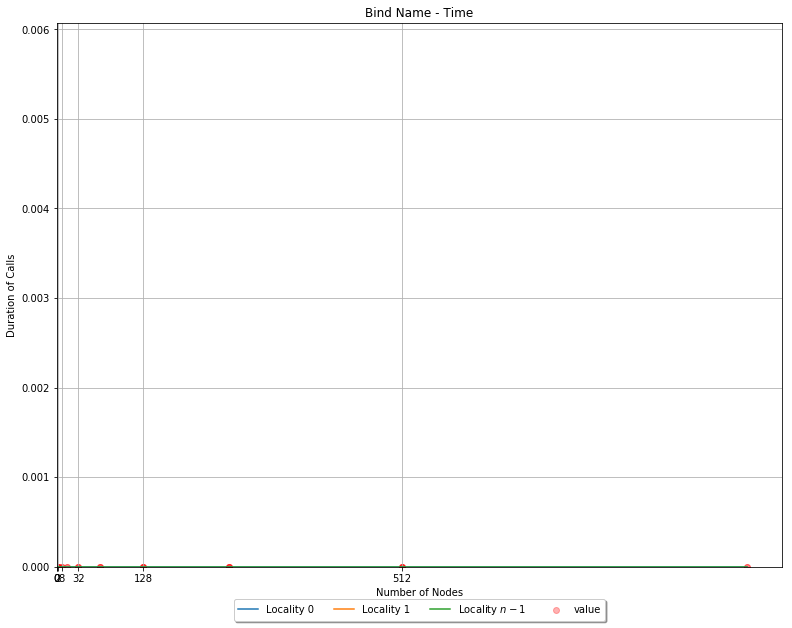

In [31]:
crt = d[(d.sys=='agas') & (d.proc=='bind_name') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind Name - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Unbind Name

(0.0, 0.006070640176600442)

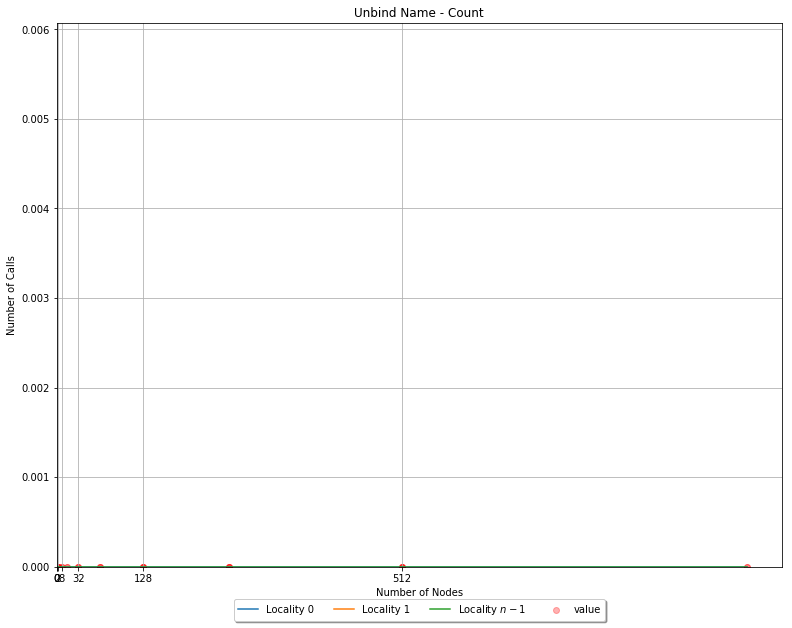

In [32]:
crt = d[(d.sys=='agas') & (d.proc=='unbind_name') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Unbind Name - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

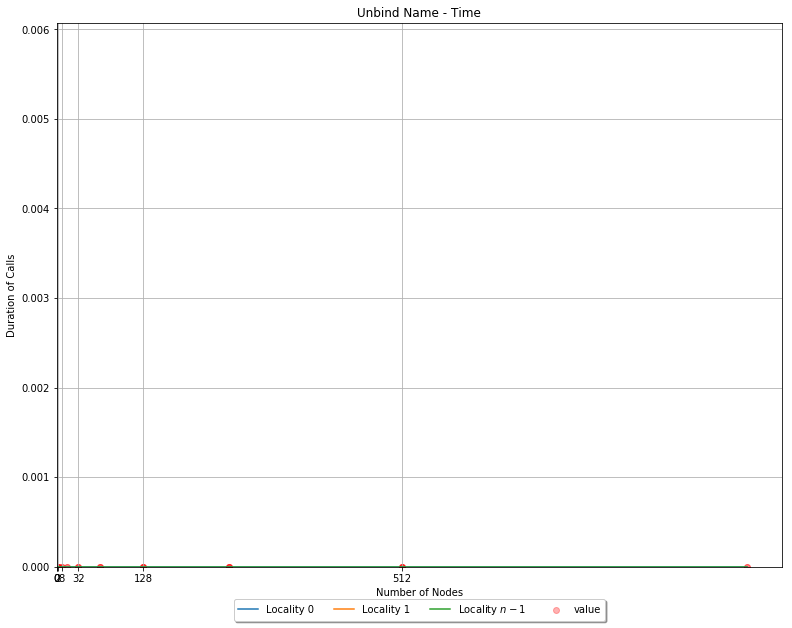

In [33]:
crt = d[(d.sys=='agas') & (d.proc=='unbind_name') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Unbind Name - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Resolve ID

(0.0, 0.006070640176600442)

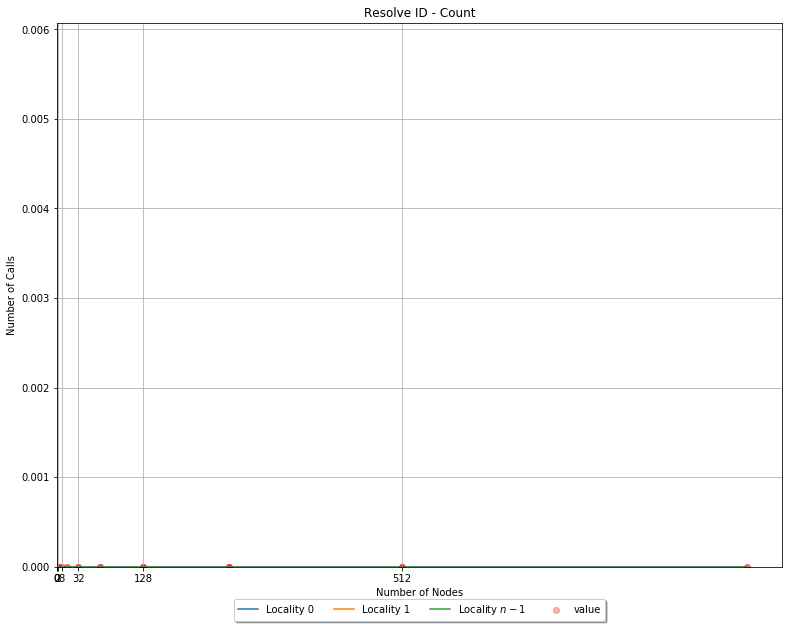

In [34]:
crt = d[(d.sys=='agas') & (d.proc=='resolve_id') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Resolve ID - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

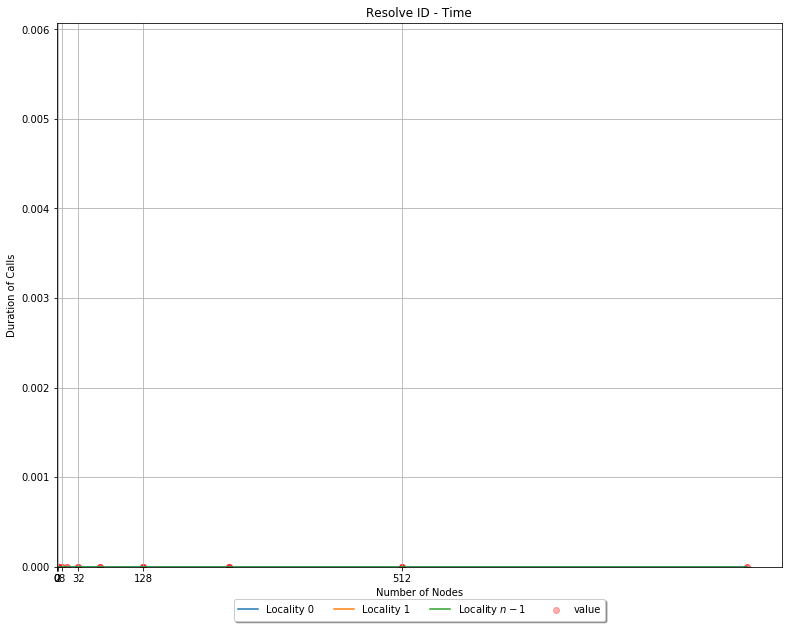

In [35]:
crt = d[(d.sys=='agas') & (d.proc=='resolve_id') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Resolve ID - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Iterate Types

(0.0, 0.006070640176600442)

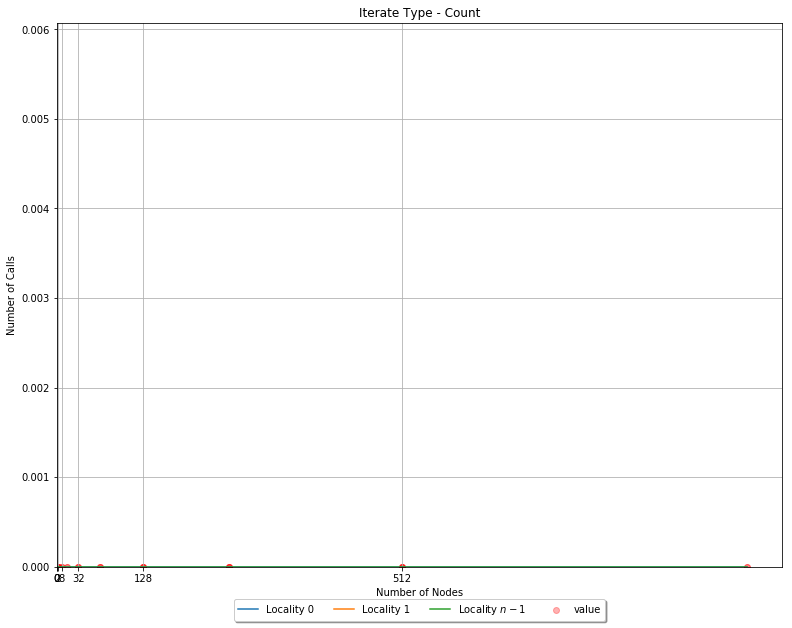

In [36]:
crt = d[(d.sys=='agas') & (d.proc=='iterate_types') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Iterate Type - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

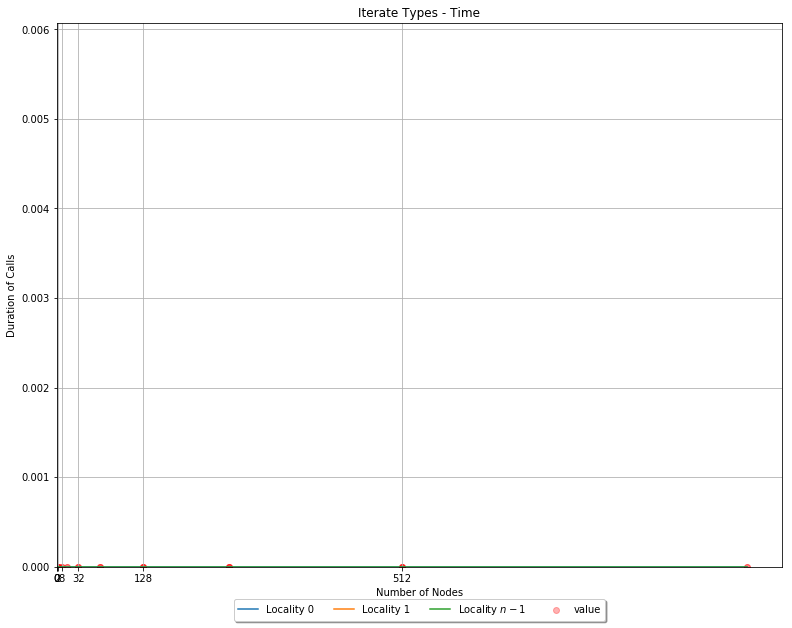

In [37]:
crt = d[(d.sys=='agas') & (d.proc=='iterate_types') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Iterate Types - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Get Component Type Name

(0.0, 0.006070640176600442)

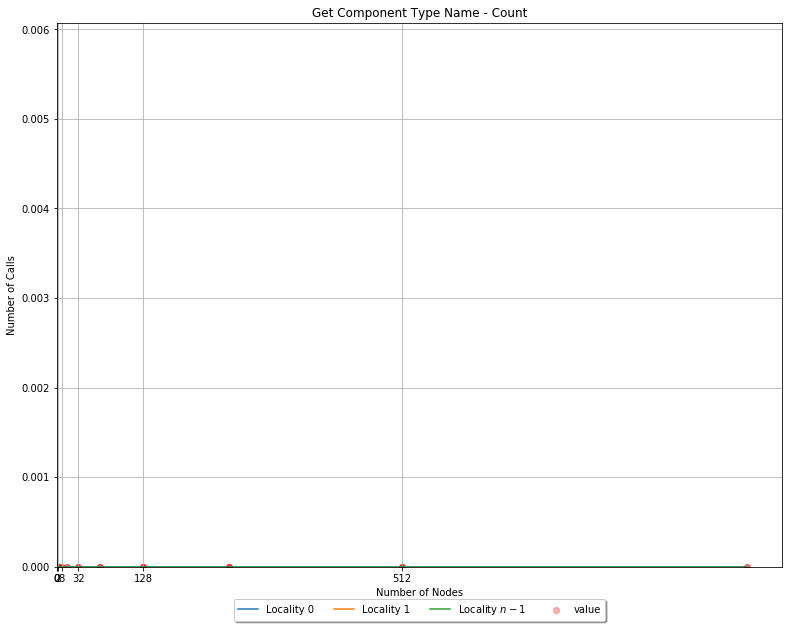

In [38]:
crt = d[(d.sys=='agas') & (d.proc=='get_component_typename') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Get Component Type Name - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

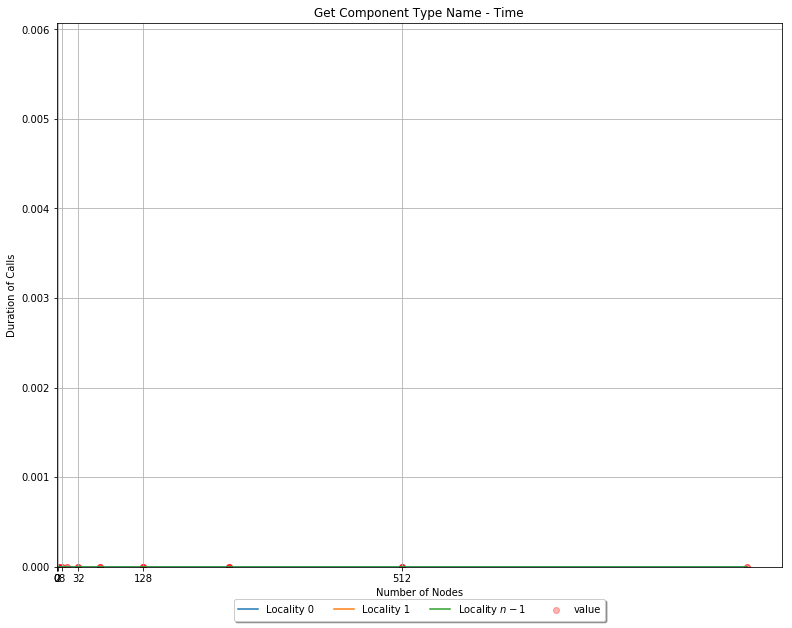

In [39]:
crt = d[(d.sys=='agas') & (d.proc=='get_component_typename') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Get Component Type Name - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Number of Locality Type

(0.0, 0.006070640176600442)

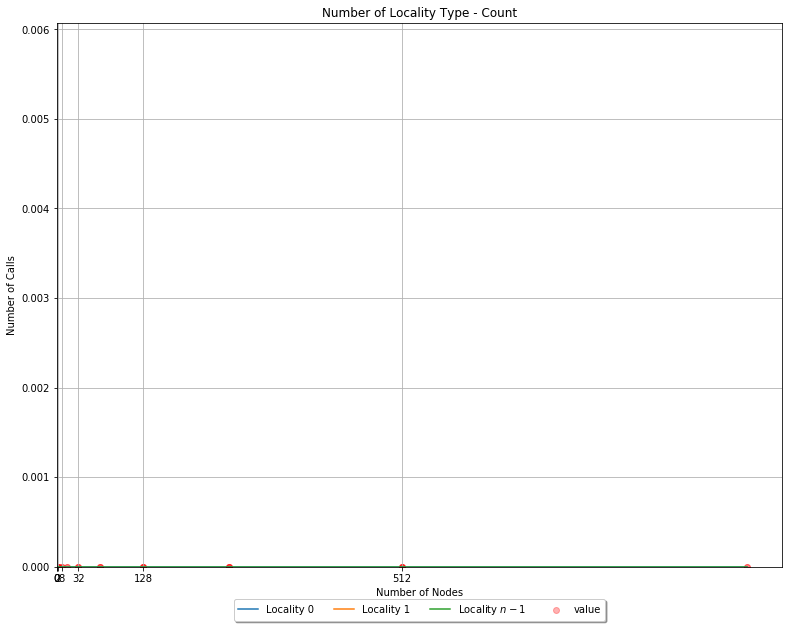

In [40]:
crt = d[(d.sys=='agas') & (d.proc=='num_localities_type') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Number of Locality Type - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

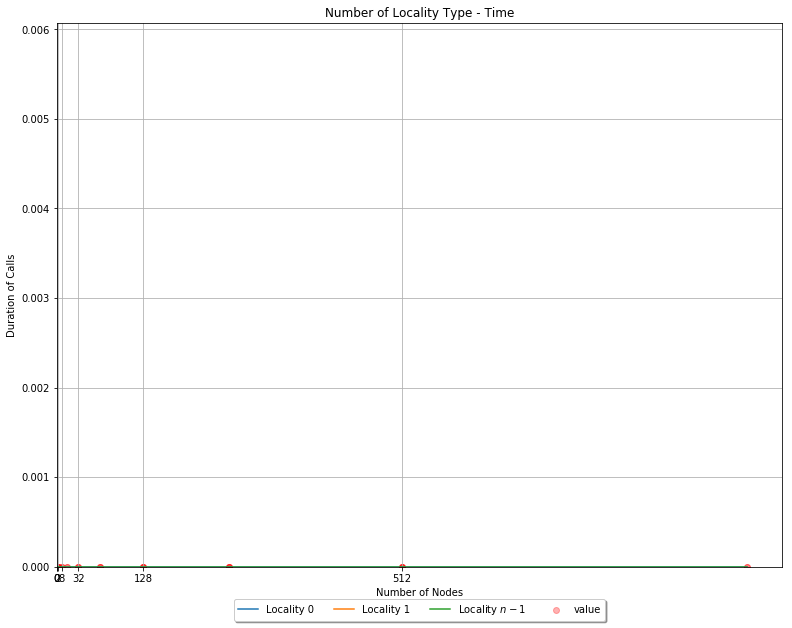

In [41]:
crt = d[(d.sys=='agas') & (d.proc=='num_localities_type') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Number of Locality Type - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

## Locality Namespace

### Free

(0.0, 0.006070640176600442)

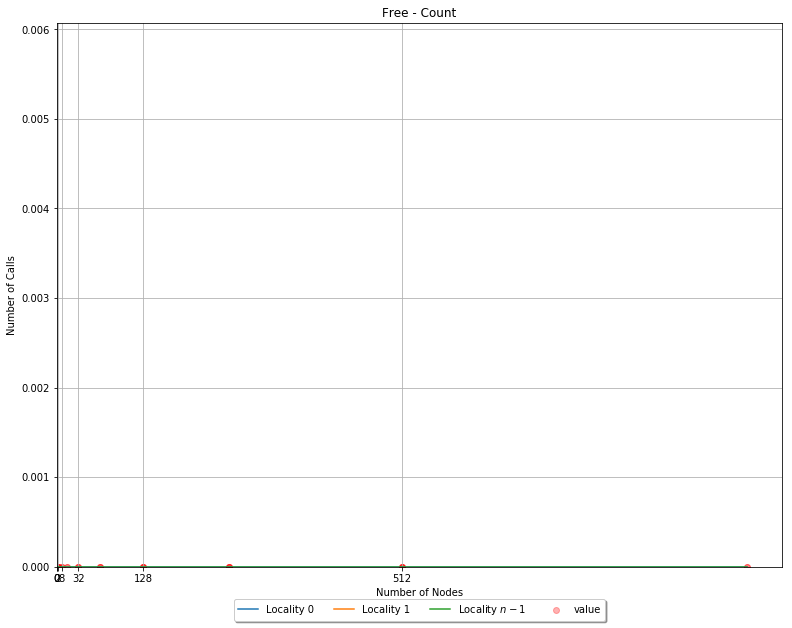

In [42]:
crt = d[(d.sys=='agas') & (d.proc=='free') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Free - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

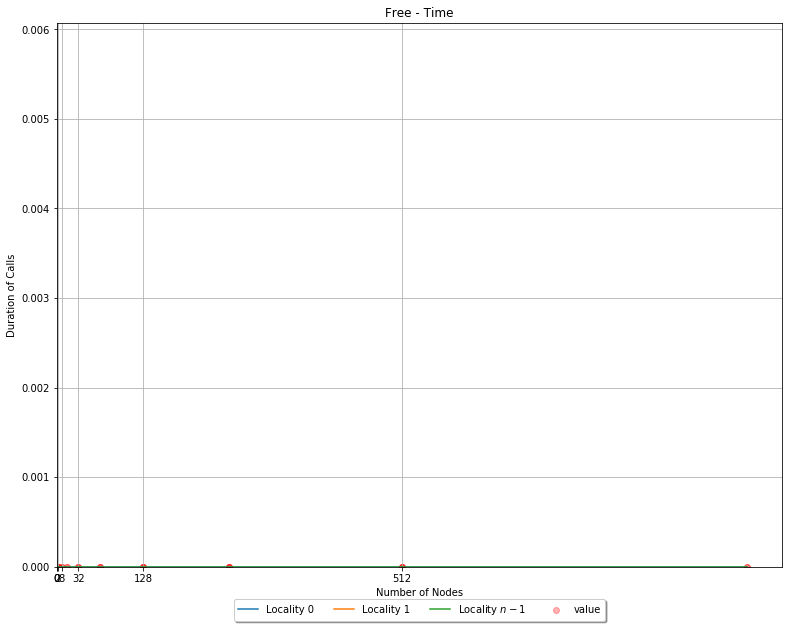

In [43]:
crt = d[(d.sys=='agas') & (d.proc=='free') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Free - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Localities

(0.0, 2.0060706401766)

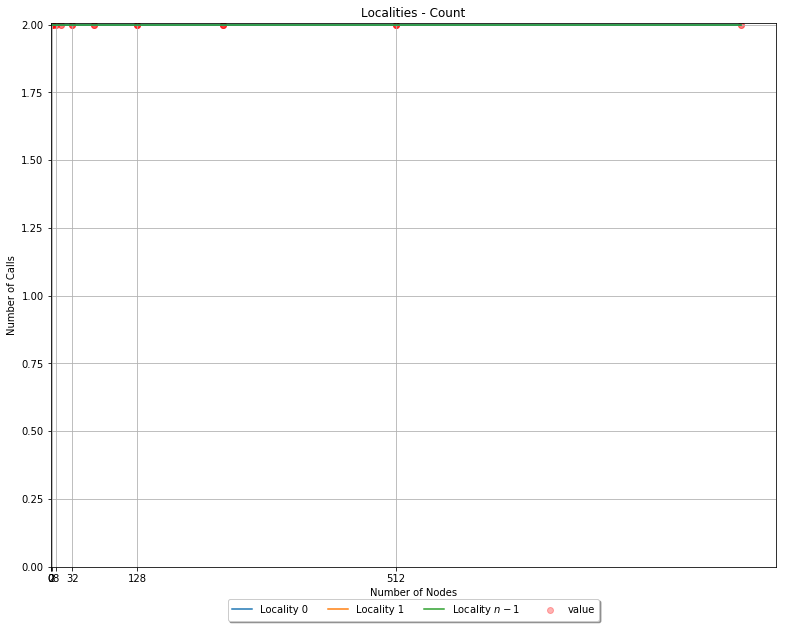

In [44]:
crt = d[(d.sys=='agas') & (d.proc=='localities') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Localities - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 93351.95607064017)

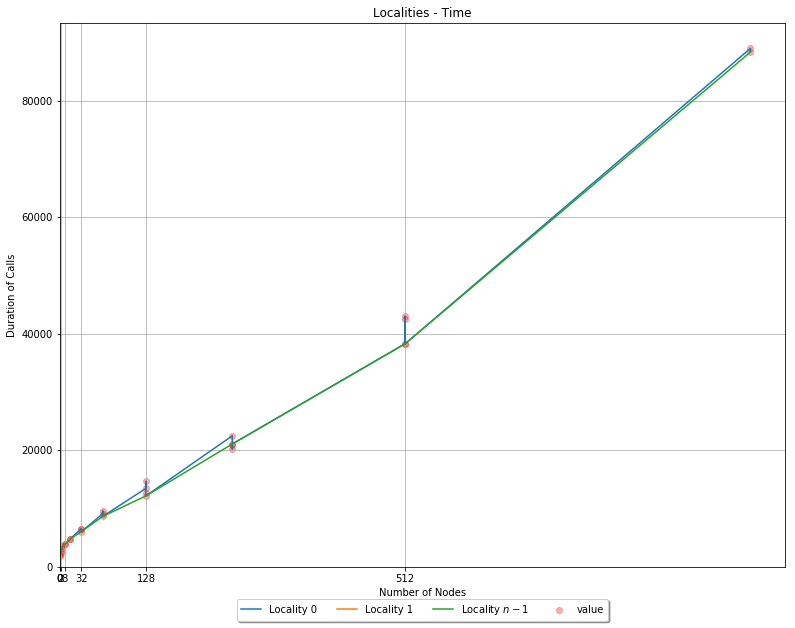

In [45]:
crt = d[(d.sys=='agas') & (d.proc=='localities') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Localities - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Number of Localities

(0.0, 29065.056070640177)

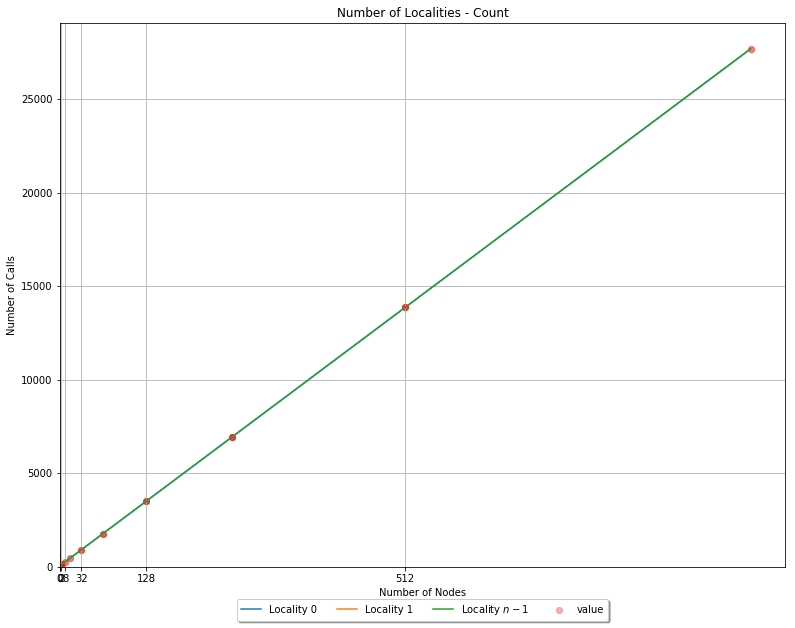

In [46]:
crt = d[(d.sys=='agas') & (d.proc=='num_localities') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Number of Localities - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 6979481.1060706405)

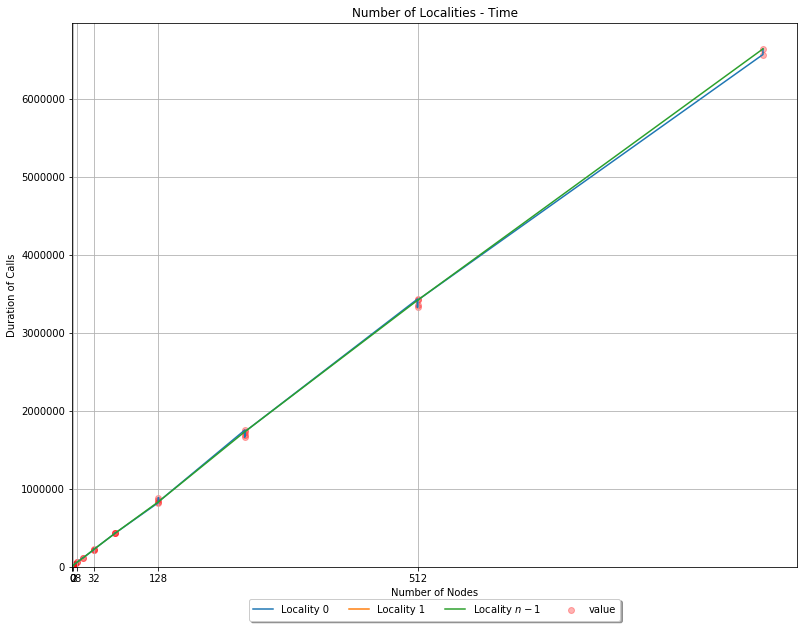

In [47]:
crt = d[(d.sys=='agas') & (d.proc=='num_localities') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Number of Localities - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Resolve Locality

(0.0, 0.006070640176600442)

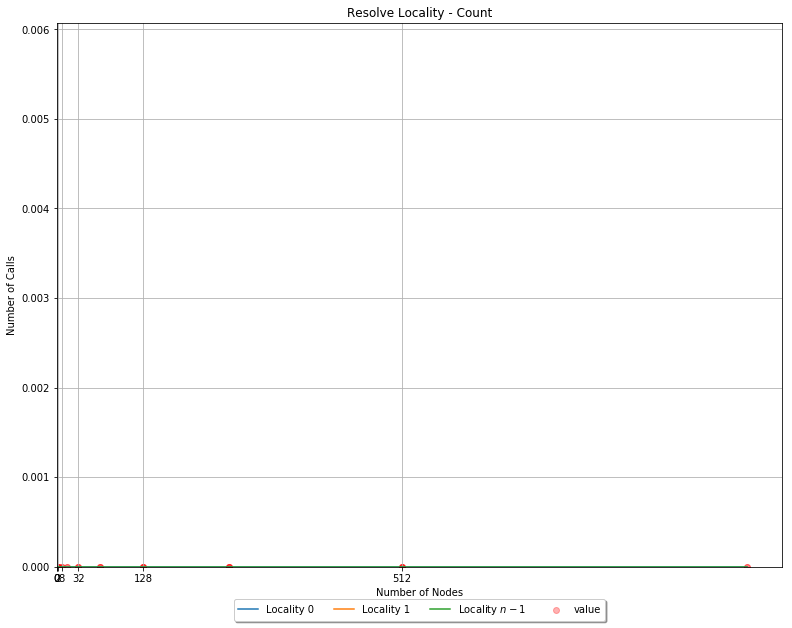

In [48]:
crt = d[(d.sys=='agas') & (d.proc=='resolve_locality') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Resolve Locality - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

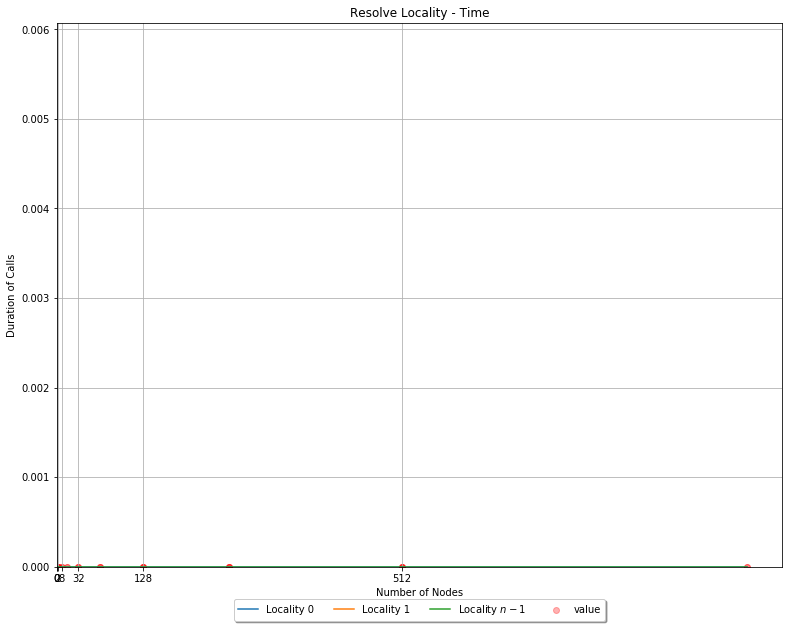

In [49]:
crt = d[(d.sys=='agas') & (d.proc=='resolve_locality') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Resolve Locality - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Number of Threads

(0.0, 0.006070640176600442)

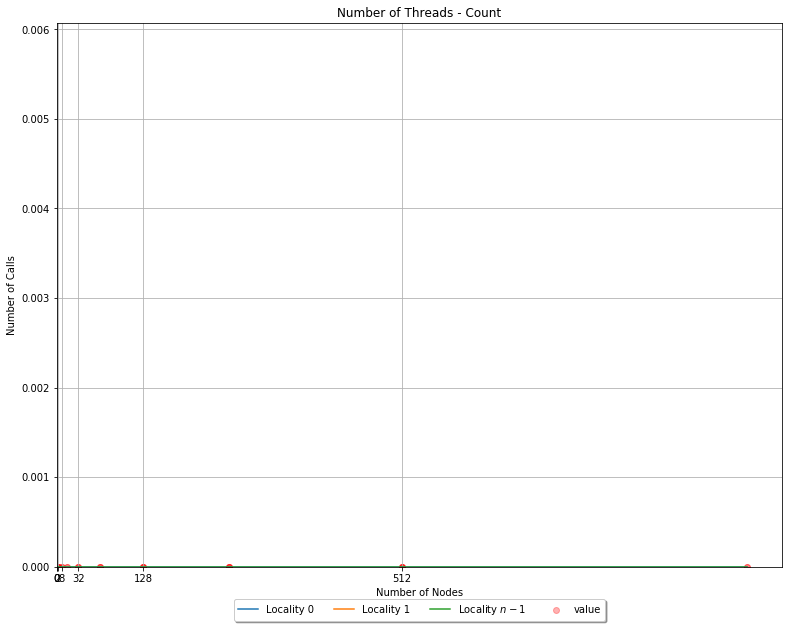

In [50]:
crt = d[(d.sys=='agas') & (d.proc=='num_threads') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Number of Threads - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

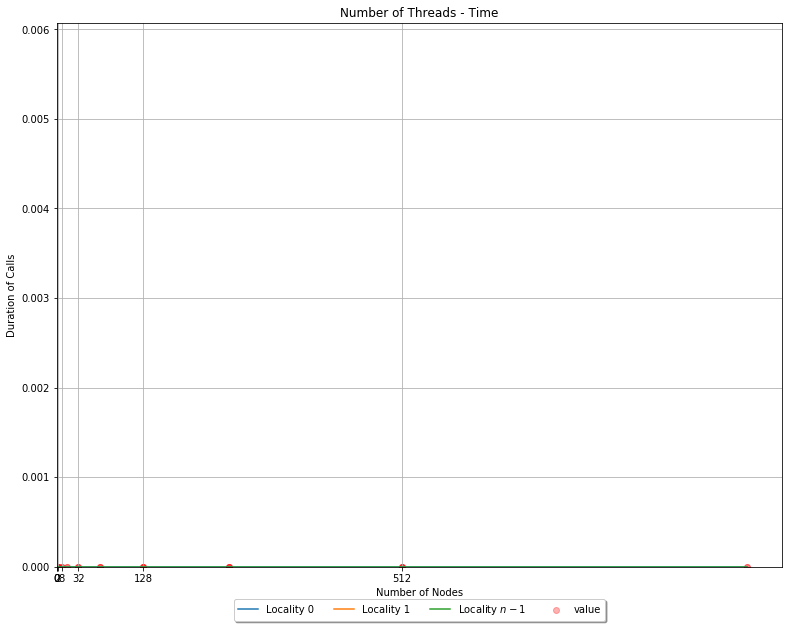

In [51]:
crt = d[(d.sys=='agas') & (d.proc=='num_threads') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Number of Threads - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

## Symbol Namespace

### Bind

(0.0, 46.7060706401766)

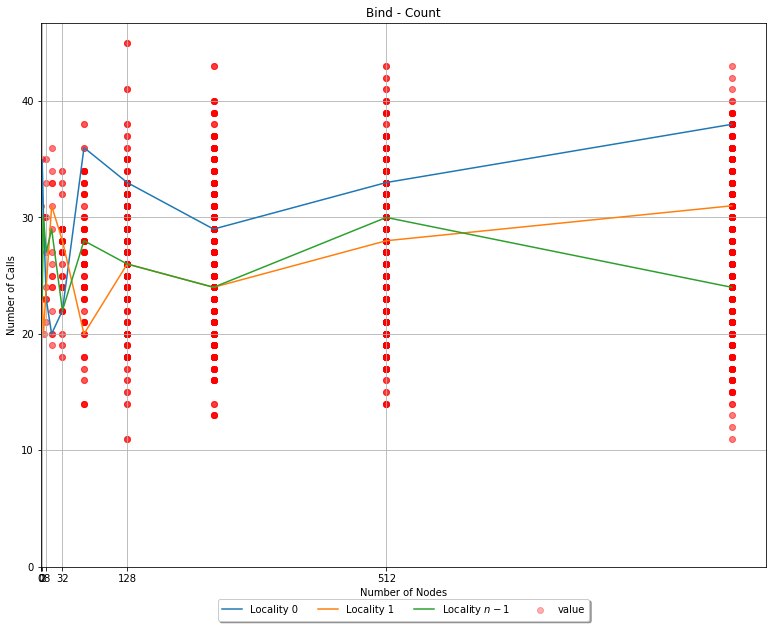

In [52]:
crt = d[(d.sys=='agas') & (d.proc=='bind') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 118702.40607064018)

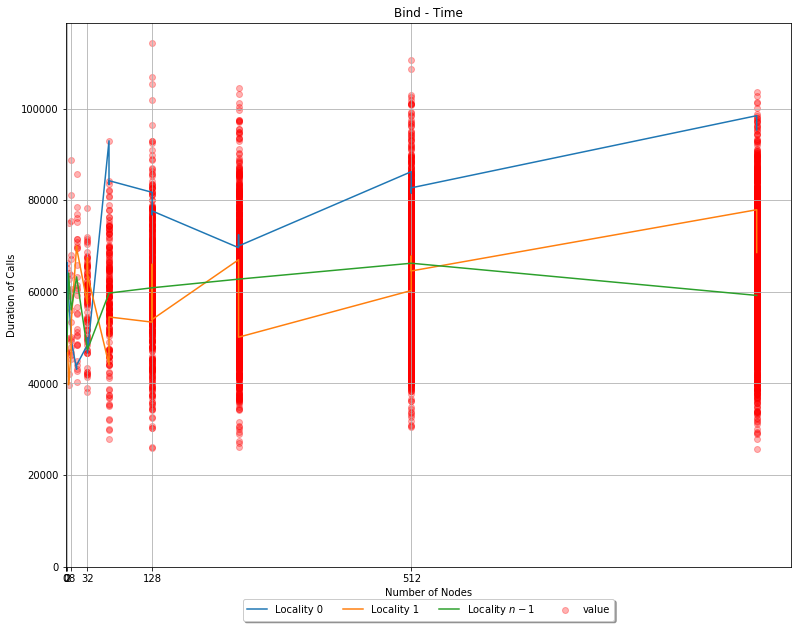

In [53]:
crt = d[(d.sys=='agas') & (d.proc=='bind') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Bind - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Unbind

(0.0, 0.006070640176600442)

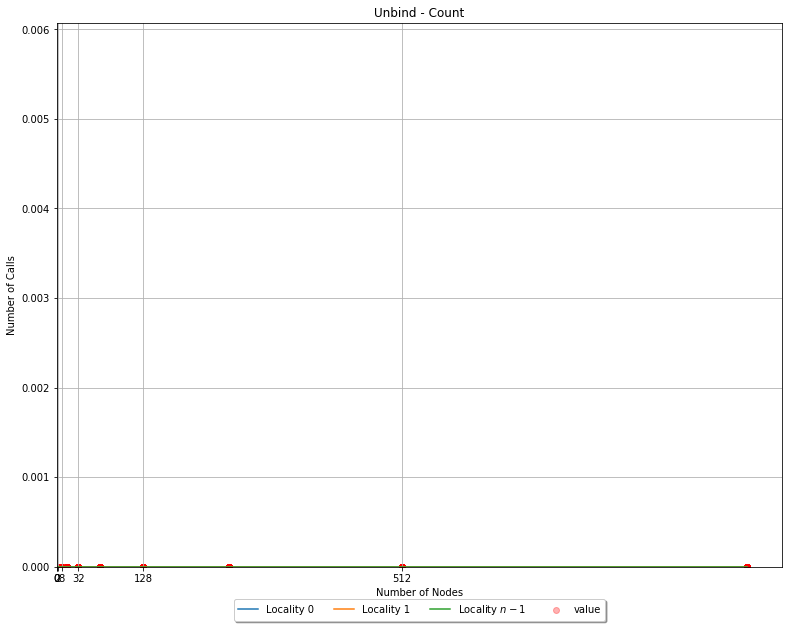

In [54]:
crt = d[(d.sys=='agas') & (d.proc=='unbind') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Unbind - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

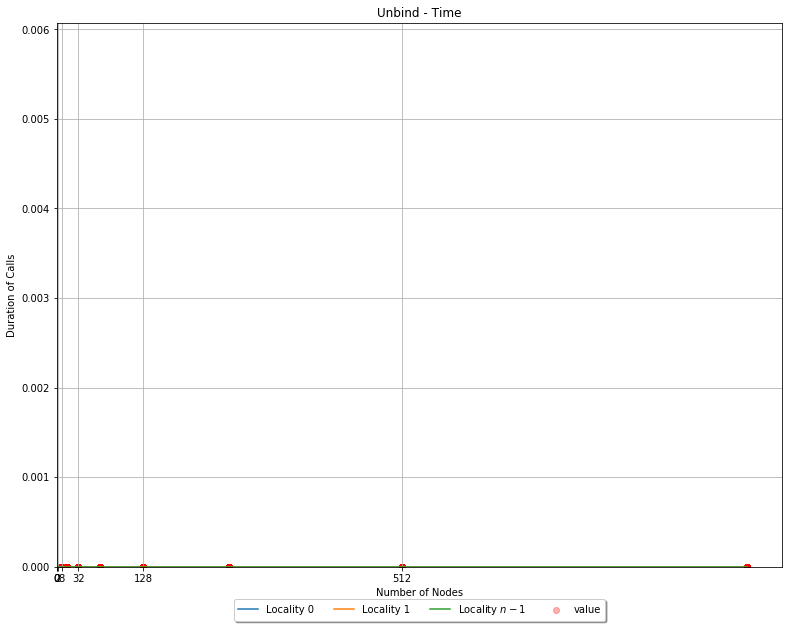

In [55]:
crt = d[(d.sys=='agas') & (d.proc=='unbind') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Unbind - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Resolve

(0.0, 10789.406070640176)

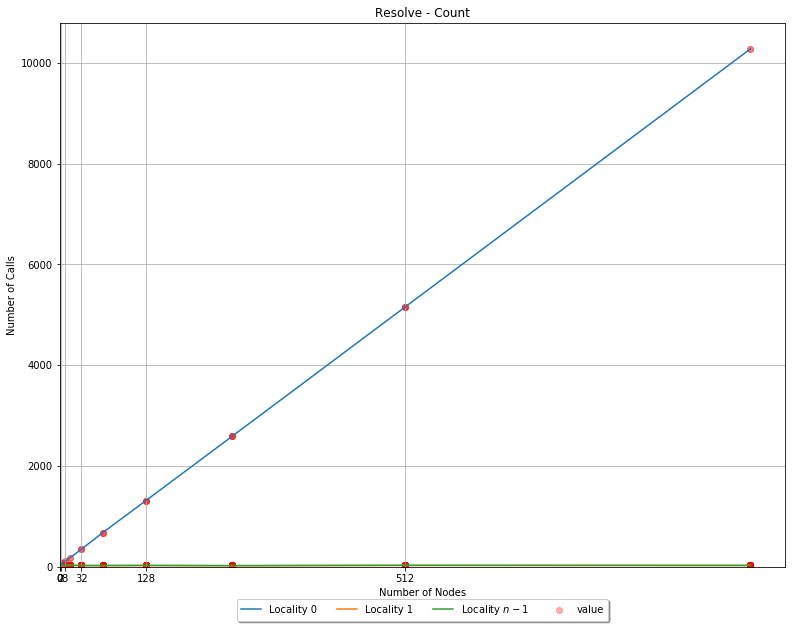

In [56]:
crt = d[(d.sys=='agas') & (d.proc=='resolve') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Resolve - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 29128784.00607064)

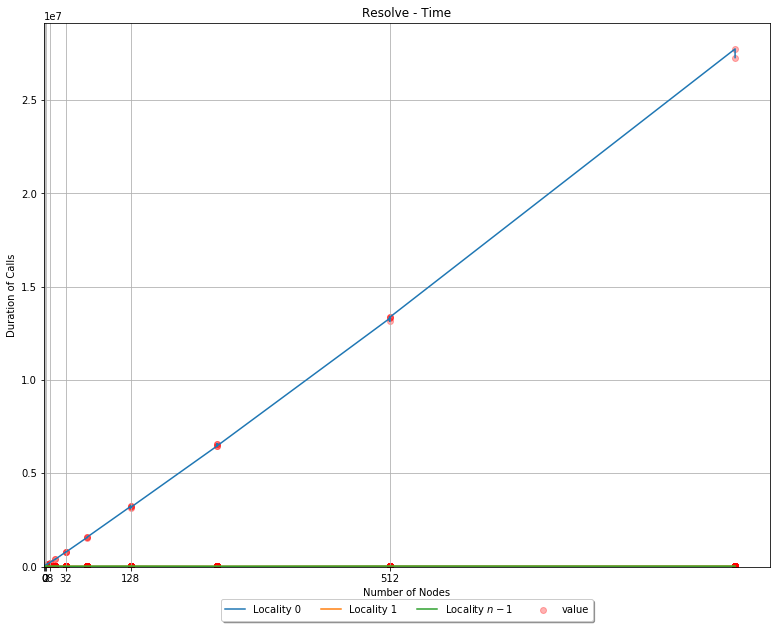

In [57]:
crt = d[(d.sys=='agas') & (d.proc=='resolve') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Resolve - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Iterate Names

(0.0, 0.006070640176600442)

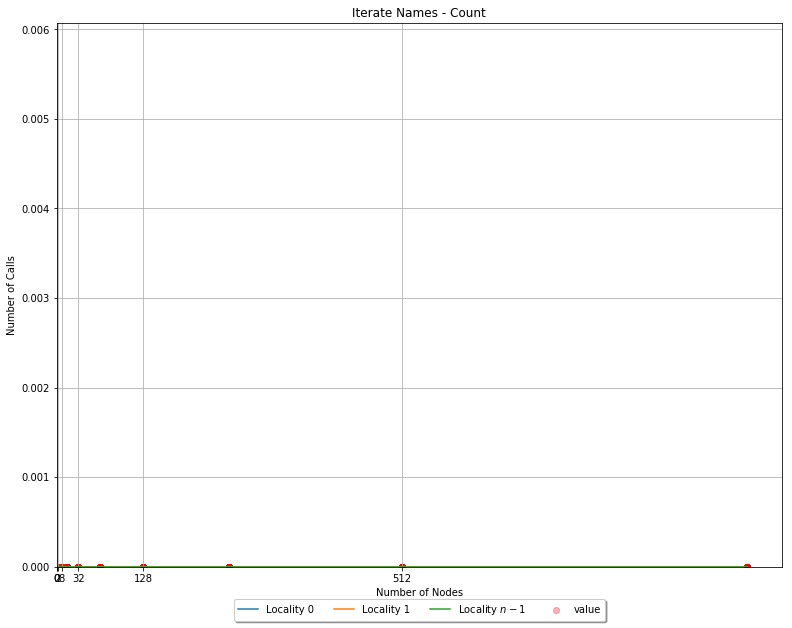

In [58]:
crt = d[(d.sys=='agas') & (d.proc=='iterate_names') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Iterate Names - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

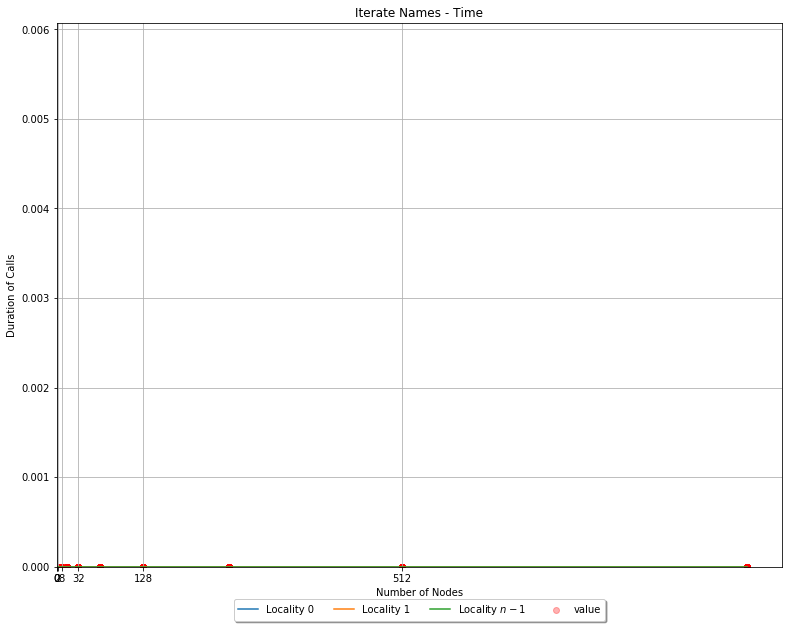

In [59]:
crt = d[(d.sys=='agas') & (d.proc=='iterate_names') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('Iterate Names - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### On Symbol Namespace Event

(0.0, 0.006070640176600442)

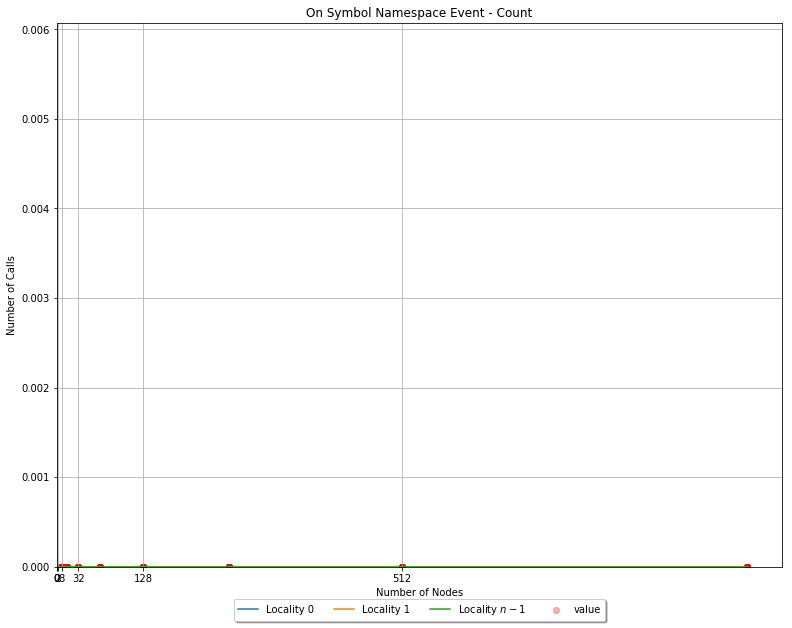

In [60]:
crt = d[(d.sys=='agas') & (d.proc=='on_symbol_namespace_event') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('On Symbol Namespace Event - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

(0.0, 0.006070640176600442)

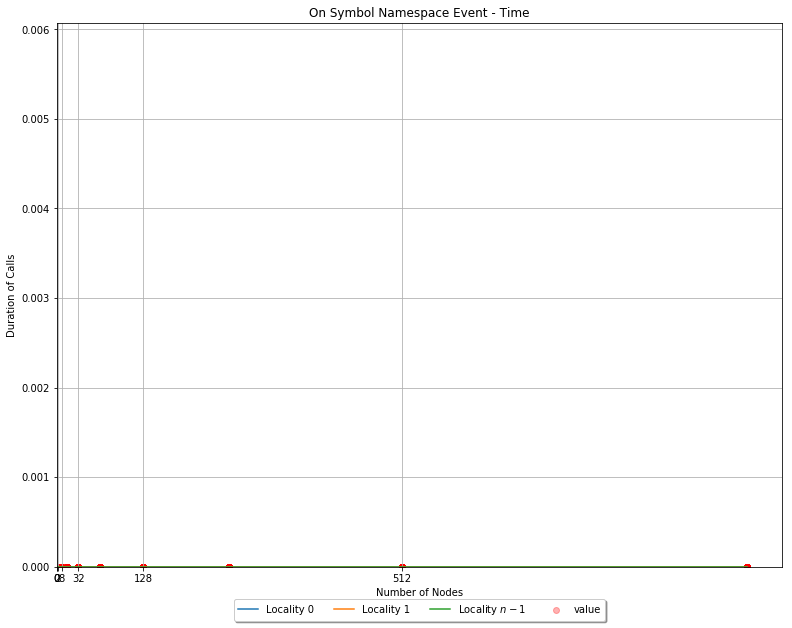

In [61]:
crt = d[(d.sys=='agas') & (d.proc=='on_symbol_namespace_event') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('On Symbol Namespace Event - Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

---

## AGAS Cache

### Number of Cache Entries

(0.0, 4300.806070640176)

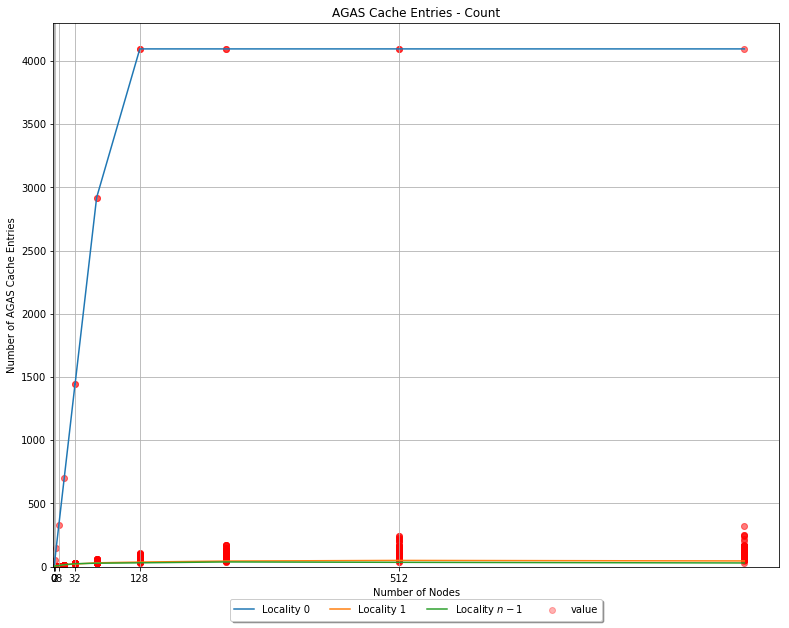

In [62]:
crt = d[(d.sys=='agas') & (d.proc=='cache.entries') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Entries - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of AGAS Cache Entries')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### AGAS Cache Insertions

(0.0, 128948.4060706402)

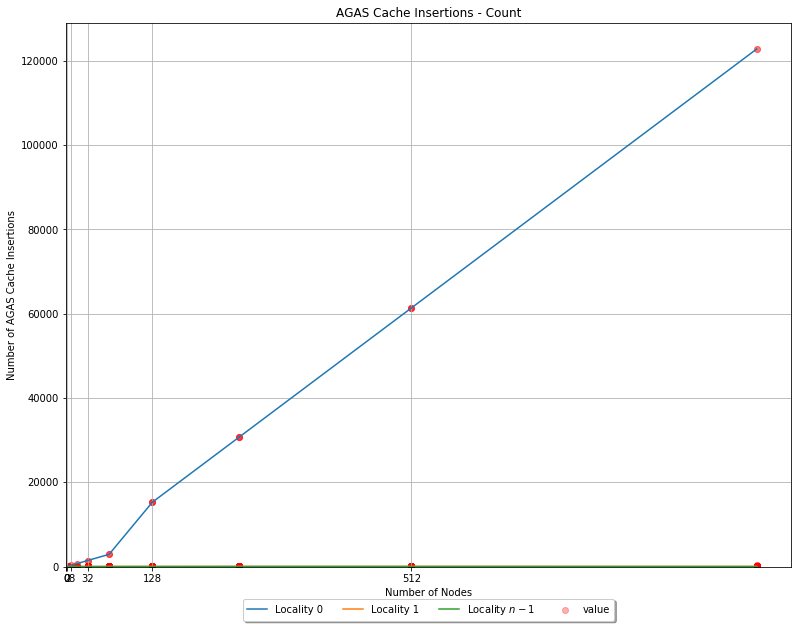

In [63]:
crt = d[(d.sys=='agas') & (d.proc=='cache.insertions') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Insertions - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of AGAS Cache Insertions')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### AGAS Cache Evictions

(0.0, 125721.75607064017)

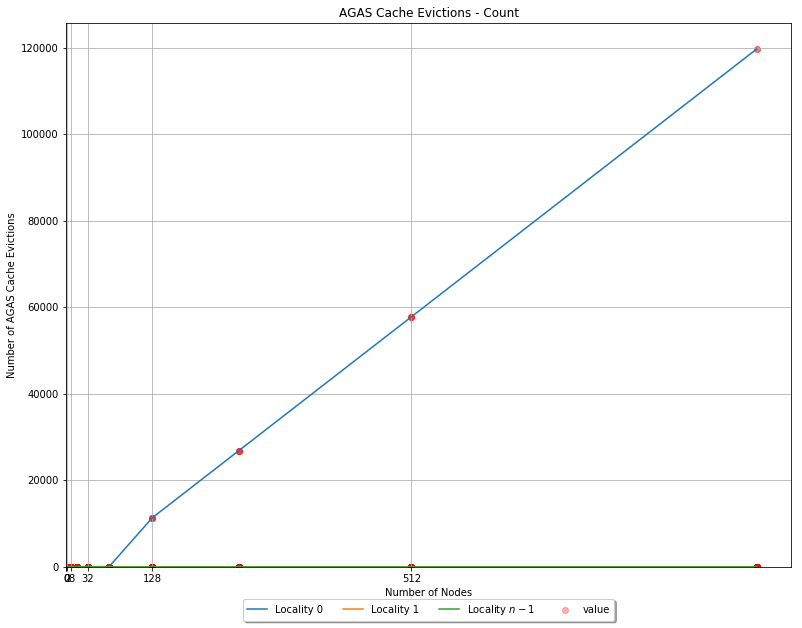

In [259]:
crt = d[(d.sys=='agas') & (d.proc=='cache.evictions') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)
#
t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')
#
t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Evictions - Count')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of AGAS Cache Evictions')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### AGAS Cache Hit Rate

* $\textit{hits}$: `/agas{locality#*/total}/count/cache/hits`
* $\textit{misses}$: `/agas{locality#*/total}/count/cache/misses`

$$
\textit{miss rate} = \frac{\textit{misses}}{\textit{misses} + \textit{hits}}
$$

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(0.0, 1.0463009237878382)

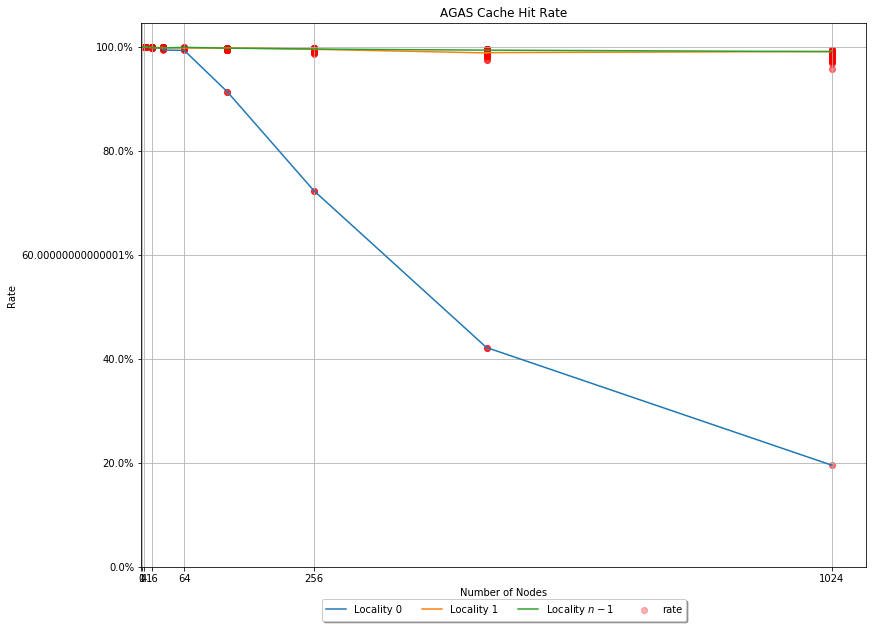

In [311]:
crt_h = d[(d.sys=='agas') & (d.proc=='cache.hits') & (d.type=='count')]
crt_m = d[(d.sys=='agas') & (d.proc=='cache.misses') & (d.type=='count')]

crt_m = crt_m.set_index(crt_h.index)

crt = crt_h[['nodes', 'value', 'locality']]
#crt.is_copy = False # Disable the warning
crt['rate'] = crt_h.value / (crt_h.value + crt_m.value)

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.rate, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.rate, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.rate, label='Locality 1')

t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.rate, label='Locality $n - 1$')

plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Hit Rate')
plt.xlabel('Number of Nodes')
plt.ylabel('Rate')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().yaxis.set_major_formatter(PercentFormatter)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Get Entry

(0.0, 480072600.0060706)

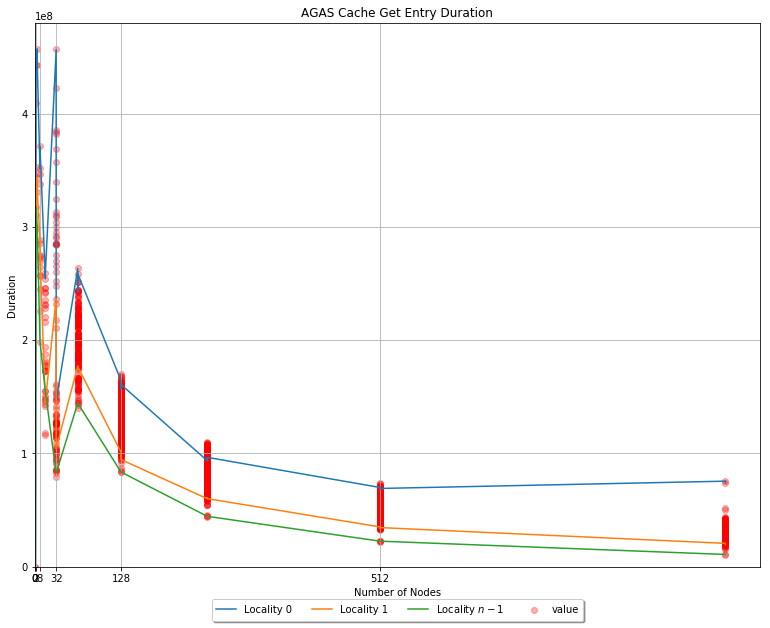

In [66]:
crt = d[(d.sys=='agas') & (d.proc=='cache.get_entry') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Get Entry Duration')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Insert Entry

(0.0, 207388650.00607064)

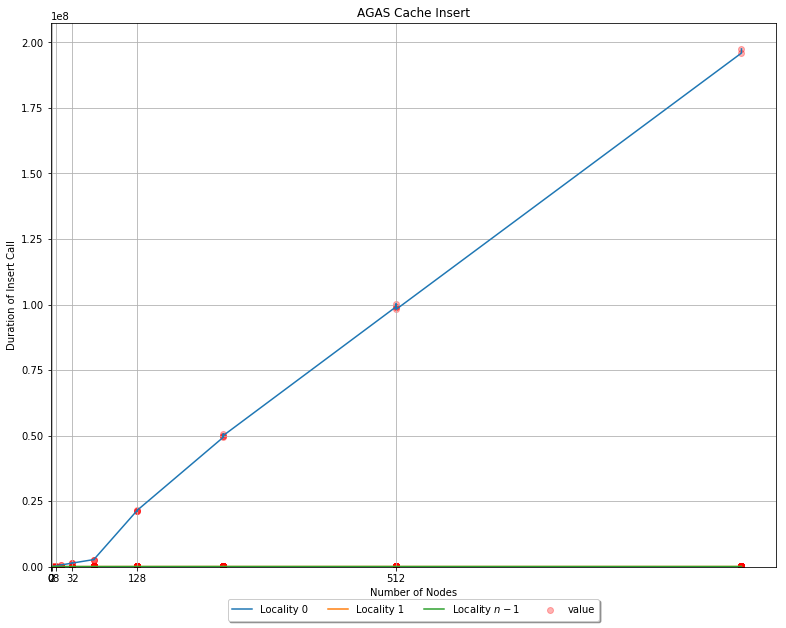

In [67]:
crt = d[(d.sys=='agas') & (d.proc=='cache.insert_entry') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Insert')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Insert Call')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Update Entry

(0.0, 137576.25607064017)

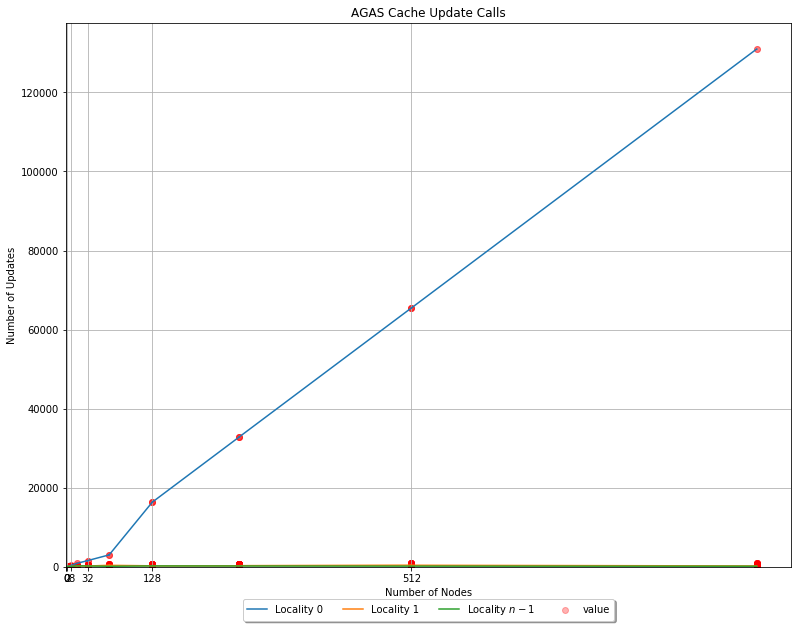

In [68]:
crt = d[(d.sys=='agas') & (d.proc=='cache.update_entry') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Update Calls')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Updates')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

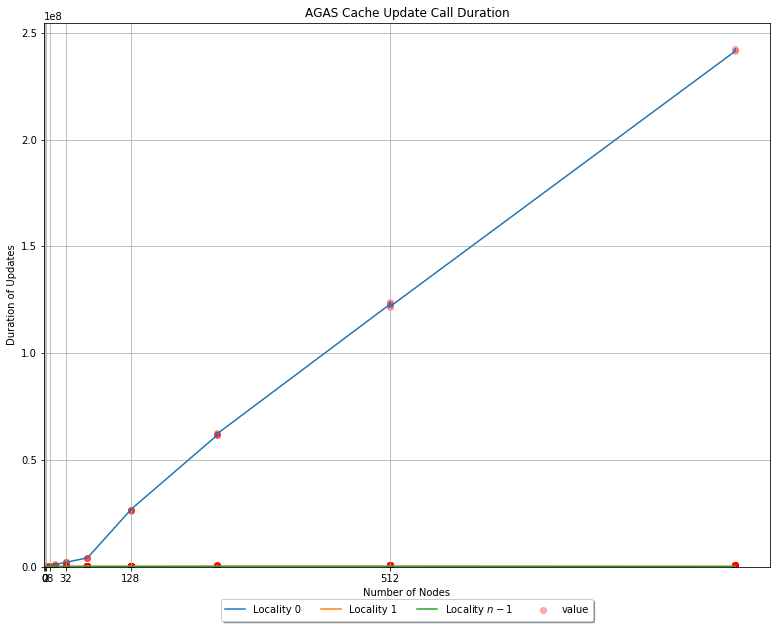

In [69]:
crt = d[(d.sys=='agas') & (d.proc=='cache.update_entry') & (d.type=='time')]

if crt.size > 0:
    plt.figure(figsize=(13, 10))
    plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

    t = crt[crt.locality==0]
    plt.plot(t.nodes, t.value, label='Locality 0')

    t = crt[crt.locality==1]
    plt.plot(t.nodes, t.value, label='Locality 1')
    #
    t = crt.groupby('nodes', as_index=False).last()
    plt.plot(t.nodes, t.value, label='Locality $n - 1$')
    #
    plt.grid()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    plt.title('AGAS Cache Update Call Duration')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Duration of Updates')

    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
    plt.gca().set_xlim(left=0.)
    plt.gca().set_ylim(bottom=0.)

### Erase Entry

(0.0, 0.006070640176600442)

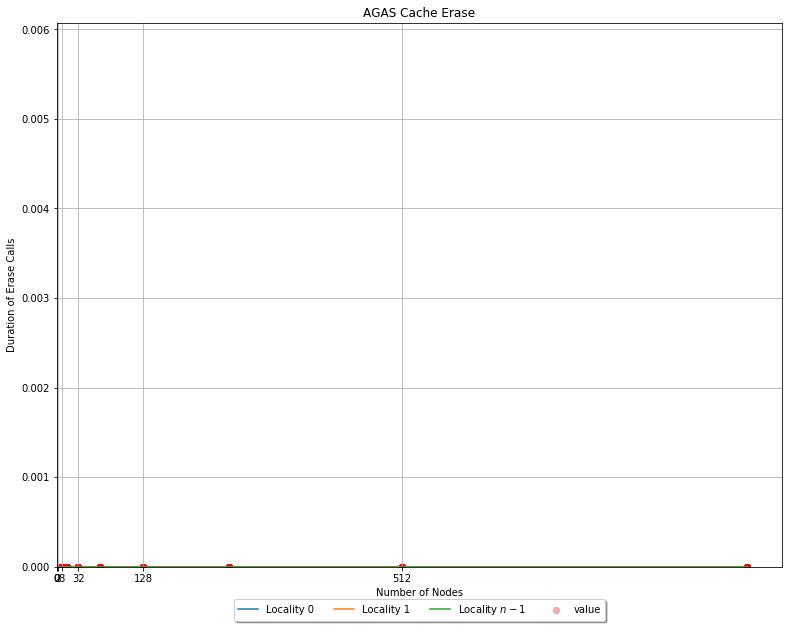

In [70]:
crt = d[(d.sys=='agas') & (d.proc=='cache.erase_entry') & (d.type=='time')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Cache Erase')
plt.xlabel('Number of Nodes')
plt.ylabel('Duration of Erase Calls')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

***

## Overview

### Primary Namespace

(0.0, 44914997.25607064)

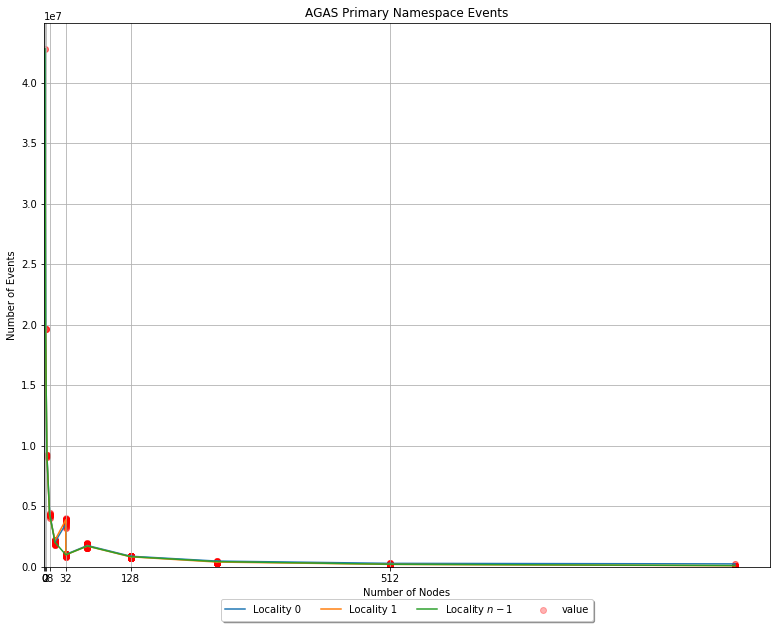

In [71]:
crt = d[(d.sys=='agas') & (d.proc=='primary') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Primary Namespace Events')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Events')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

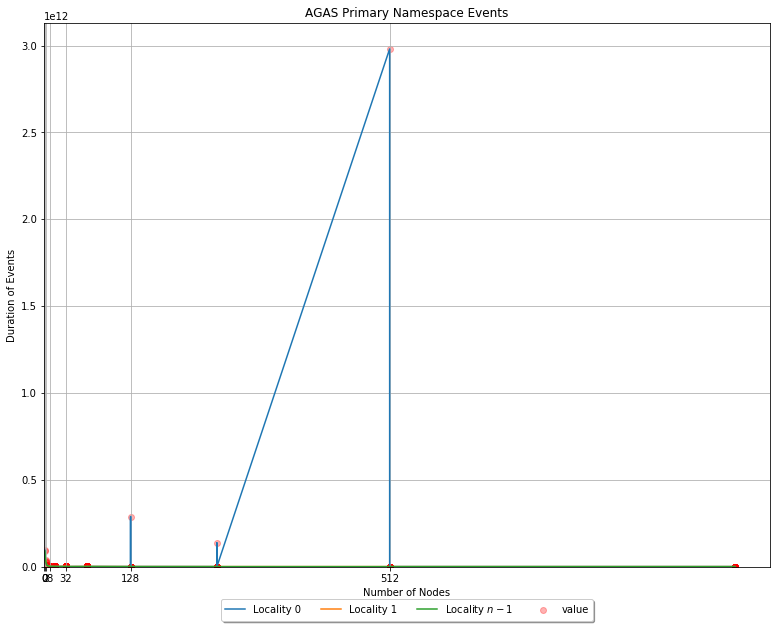

In [72]:
crt = d[(d.sys=='agas') & (d.proc=='primary') & (d.type=='time')]

if crt.size > 0:
    plt.figure(figsize=(13, 10))
    plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

    t = crt[crt.locality==0]
    plt.plot(t.nodes, t.value, label='Locality 0')

    t = crt[crt.locality==1]
    plt.plot(t.nodes, t.value, label='Locality 1')
    #
    t = crt.groupby('nodes', as_index=False).last()
    plt.plot(t.nodes, t.value, label='Locality $n - 1$')
    #
    plt.grid()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    plt.title('AGAS Primary Namespace Events')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Duration of Events')

    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
    plt.gca().set_xlim(left=0.)
    plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Component Namespace

(0.0, 0.006070640176600442)

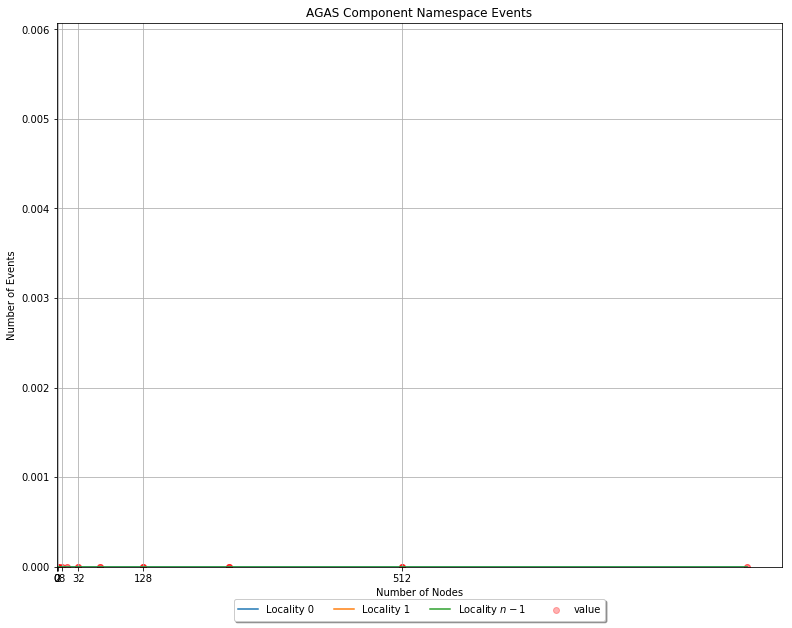

In [73]:
crt = d[(d.sys=='agas') & (d.proc=='component') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Component Namespace Events')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Events')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

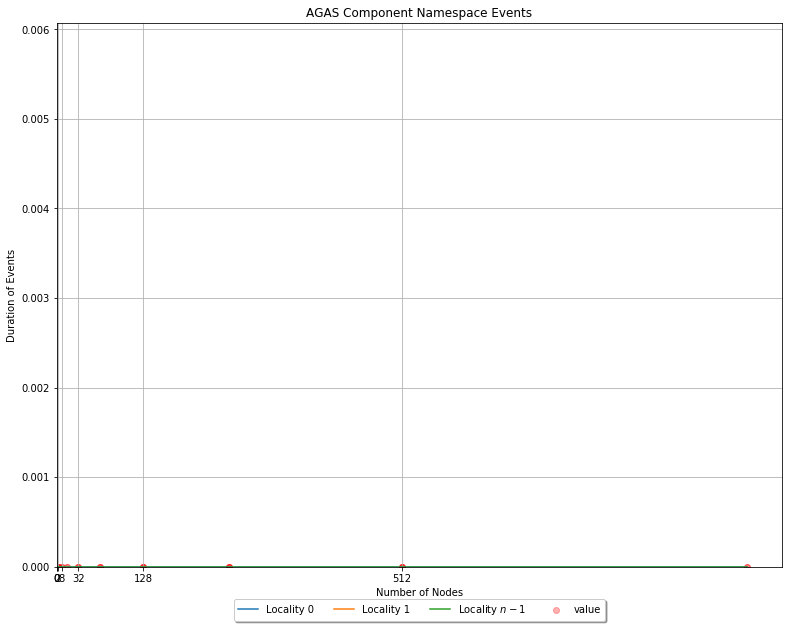

In [74]:
crt = d[(d.sys=='agas') & (d.proc=='component') & (d.type=='time')]

if crt.size > 0:
    plt.figure(figsize=(13, 10))
    plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

    t = crt[crt.locality==0]
    plt.plot(t.nodes, t.value, label='Locality 0')

    t = crt[crt.locality==1]
    plt.plot(t.nodes, t.value, label='Locality 1')
    #
    t = crt.groupby('nodes', as_index=False).last()
    plt.plot(t.nodes, t.value, label='Locality $n - 1$')
    #
    plt.grid()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    plt.title('AGAS Component Namespace Events')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Duration of Events')

    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
    plt.gca().set_xlim(left=0.)
    plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Locality Namespace

(0.0, 29067.05607064018)

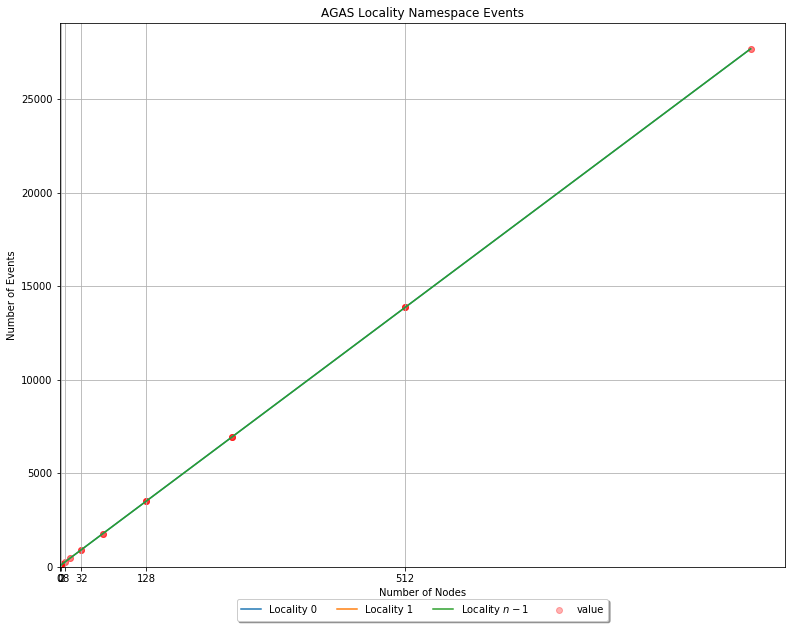

In [75]:
crt = d[(d.sys=='agas') & (d.proc=='locality') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Locality Namespace Events')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Events')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

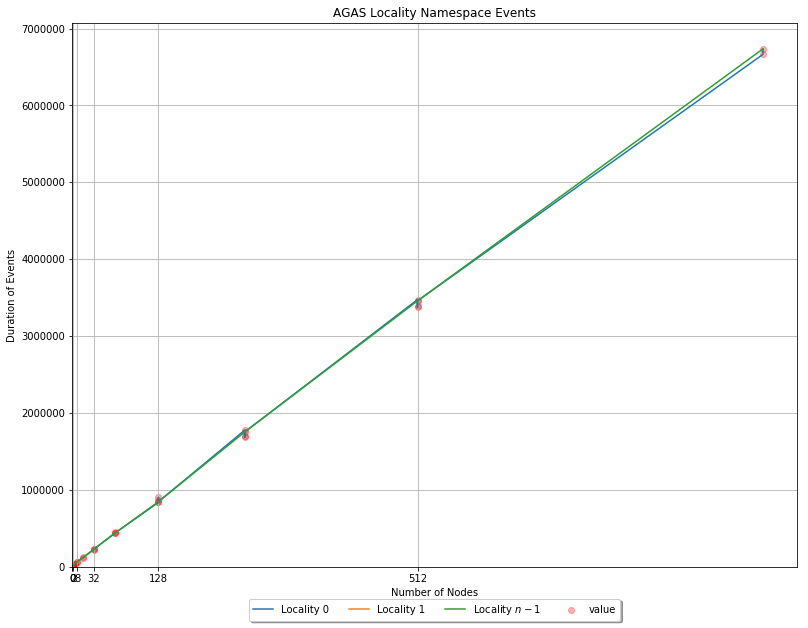

In [76]:
crt = d[(d.sys=='agas') & (d.proc=='locality') & (d.type=='time')]

if crt.size > 0:
    plt.figure(figsize=(13, 10))
    plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

    t = crt[crt.locality==0]
    plt.plot(t.nodes, t.value, label='Locality 0')

    t = crt[crt.locality==1]
    plt.plot(t.nodes, t.value, label='Locality 1')
    #
    t = crt.groupby('nodes', as_index=False).last()
    plt.plot(t.nodes, t.value, label='Locality $n - 1$')
    #
    plt.grid()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    plt.title('AGAS Locality Namespace Events')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Duration of Events')

    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
    plt.gca().set_xlim(left=0.)
    plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

### Symbol Namespace

(0.0, 10828.756070640176)

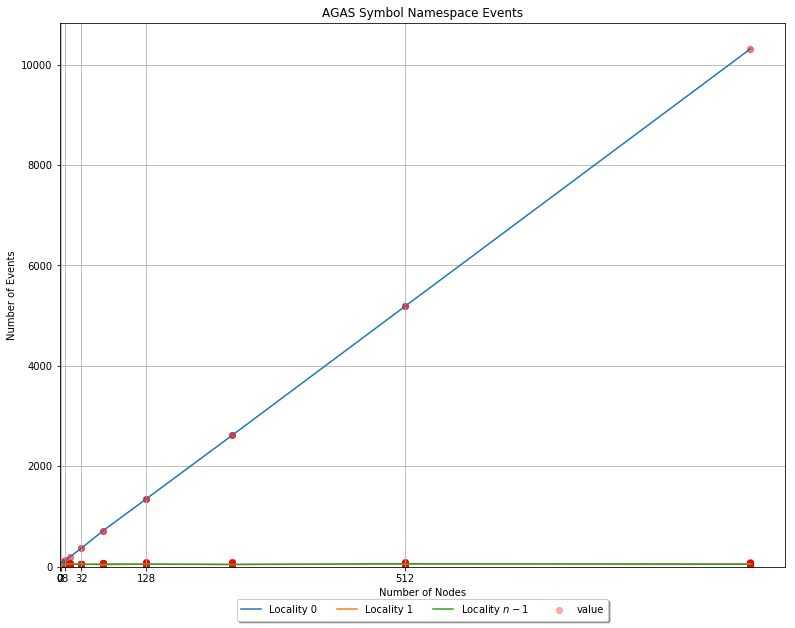

In [77]:
crt = d[(d.sys=='agas') & (d.proc=='symbol') & (d.type=='count')]

plt.figure(figsize=(13, 10))
plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

t = crt[crt.locality==0]
plt.plot(t.nodes, t.value, label='Locality 0')

t = crt[crt.locality==1]
plt.plot(t.nodes, t.value, label='Locality 1')
#
t = crt.groupby('nodes', as_index=False).last()
plt.plot(t.nodes, t.value, label='Locality $n - 1$')
#
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.title('AGAS Symbol Namespace Events')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Events')

plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
plt.gca().set_xlim(left=0.)
plt.gca().set_ylim(bottom=0.)

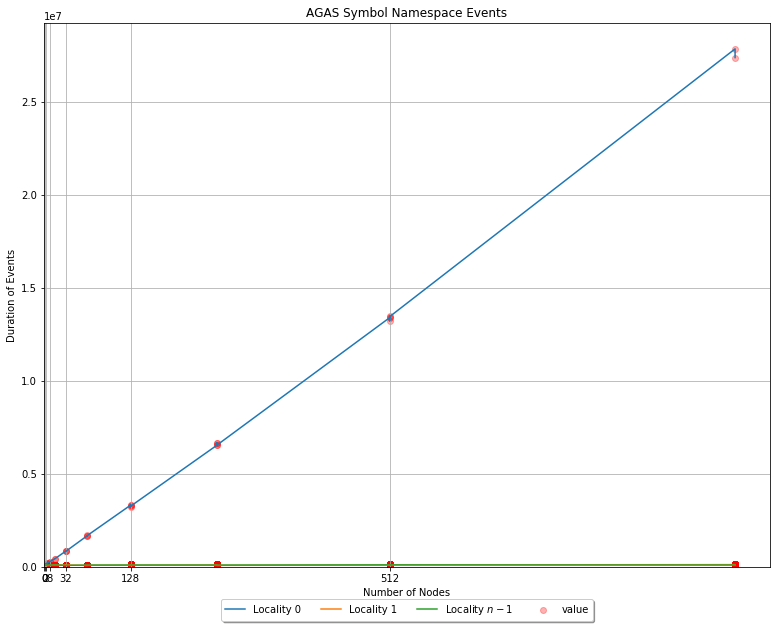

In [78]:
crt = d[(d.sys=='agas') & (d.proc=='symbol') & (d.type=='time')]

if crt.size > 0:
    plt.figure(figsize=(13, 10))
    plt.scatter(crt.nodes, crt.value, c='r', alpha=.3)

    t = crt[crt.locality==0]
    plt.plot(t.nodes, t.value, label='Locality 0')

    t = crt[crt.locality==1]
    plt.plot(t.nodes, t.value, label='Locality 1')
    #
    t = crt.groupby('nodes', as_index=False).last()
    plt.plot(t.nodes, t.value, label='Locality $n - 1$')
    #
    plt.grid()

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    plt.title('AGAS Symbol Namespace Events')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Duration of Events')

    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2))
    plt.gca().set_xlim(left=0.)
    plt.gca().set_ylim(bottom=0.)

[^ TOC ^](#Counters)

---

# Miscellaneous

### Save Dataset to disk

```python
df.to_hdf('./pfx_data.hdf', 'table', mode='w', table=True)
```

[^ TOC ^](#Counters)